![](https://cocalc.com/blobs/FullLogo_200x160.png?uuid=e2a635d0-26b8-40d1-b1c7-d0fc4fb06bd7)

## **Data Analysis with Python**

## **Capstone Project**

#### **Business Context**

With growing demands and cut\-throat competitions in the market, a Superstore Giant would like to design a customer loyalty program that strengthens its relationship with its' customers and incentivizes repeat purchases. The objective of the loyalty program is to increase customer retention and drive incremental sales by targeting customers with personalized promotional offers. The company's marketing manager has proposed to implement a tier\-based marketing campaign where customers are offered cash rewards as incentives towards their first purchase following enrollment into the loyalty program. The proposed cash reward offers are as follows:

1. Get \$200 on first purchase
2. Get \$100 on first purchase
3. Get \$25 on first purchase

The Superstore Giant is seeking your knowledge in identifying which customers should get what offer as this requires understanding the customers' buying behaviors. In addition, they would like to understand which products, regions, categories and customer segments they should target or avoid.

You have been provided access to the customer transaction database contained in the Superstore.csv file and asked to provide valuable insights into customer behavior by grouping customers into different segments based on their buying behavior and loyalty to the business.

To help guide your analysis, perform a value\-based customer segmentation analysis \(also known as RFM Segmentation\) using customers' transaction histories to group the customer base into different value segments. The final output of your analysis should be a table containing customer Ids, customer value segment and your cash reward recommendation. The output of your analysis should include recommendations on which products, regions, categories and customer segments the Superstore Giant should target or avoid.



#### <span style='color:#ffffff; font-size'>**Dataset Overview**</span>



Below provides the description of columns contained in the Superstore.csv dataset.

1. **Row ID**: Unique identifier for each row.

2. **Order ID**: Unique Order ID for each Customer.

3. **Order Date**: Order Date of the product.

4. **Ship Date**: Shipping Date of the Product.

5. **Ship Mode**: Shipping Mode specified by the Customer.

6. **Customer ID**: Unique ID to identify each Customer.

7. **Customer Name**: Name of the Customer.

8. **Segment**: The segment where the Customer belongs.

9. **Country**: Country of residence of the Customer.

10. **City**: City of residence of the Customer.

11. **State**: State of residence of the Customer.

12. **Postal Code**: Postal Code of every Customer.

13. **Region**: Region where the Customer belongs.

14. **Product ID**: Unique ID of the Product.

15. **Category**: Category of the product ordered.

16. **Sub\-Category**: Sub\-Category of the product ordered.

17. **Product Name**: Name of the Product.

18. **Sales**: Sales of the Product.

19. **Quantity**: Quantity of the Product.

20. **Discount**: Discount provided.

21. **Profit**: Profit/Loss incurred.



#### **RFM Segmentation Overview**

The following web links are reference articles that provide information about what RFM Analysis is and how to perform it.

https://patchretention.com/blog/how\-to\-calculate\-rfm\-score

[https://www.actioniq.com/blog/what\-is\-rfm\-analysis/\#:~:text=RFM analysis is a way,ve engaged with a brand](https://www.actioniq.com/blog/what-is-rfm-analysis/#:~:text=RFM%20analysis%20is%20a%20way,ve%20engaged%20with%20a%20brand) 

[https://www.optimove.com/resources/learning\-center/rfm\-segmentation](https://www.optimove.com/resources/learning-center/rfm-segmentation) 


#### <span style='color: white; background-color'>**Preliminary Data Exploration & Preprocessing**</span>



##### <span style='color: white; background-color'>**Importing Necessary Libraries & Loading the Dataset**</span>



In [3]:
# Importing all necessary Python liabriaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

In [4]:
superstore = pd.read_csv('Superstore.csv')
superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
superstore.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
superstore.shape

(9994, 21)

In [7]:
pd.isnull('superstore')

False

In [8]:
superstore.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [9]:
superstore.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [10]:
superstore.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [11]:
drop_duplicated = superstore.dropna()
drop_duplicated


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [12]:
drop_duplicated.shape

(9994, 21)

In [13]:
superstore['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [14]:
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### <span style='color:#ffffff; font-size'>**Customer Segmentation**</span>



### How can we categorize customers based on their purchasing behavior?

<br/>

We will explore customer purchasing behavior by segmenting customers using RFM analysis. Firstly, we will prepare our dataset for RFM analysis by performing some feature engineering.



##### Prepare Data for RFM Analysis



In [15]:
superstore.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [16]:
superstore['Customer ID'].nunique()

793

In [17]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [18]:
latest_date = superstore['Order Date'].max()
latest_date

Timestamp('2017-12-30 00:00:00')

In [19]:
# transctions within the last 730 days

days_730_prior = latest_date - (pd.Timedelta (days = 730))
print(days_730_prior)

obs_df = superstore[superstore['Order Date']>= pd.to_datetime(days_730_prior)]
obs_df

2015-12-31 00:00:00


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
12,13,CA-2017-114412,2017-04-15,4/20/2017,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
13,14,CA-2016-161389,2016-12-05,12/10/2016,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,CA-2017-163629,2017-11-17,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [20]:
obs_df.shape

(5910, 21)

In [21]:
obs_df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [22]:
# creating a dataframe for RFM analysis

order_sales = obs_df[['Customer ID', 'Order Date', 'Sales']] 

In [23]:
order_sales['Customer ID'].nunique()

773

In [24]:
most_recent_date = order_sales['Order Date'].max()
most_recent_date

Timestamp('2017-12-30 00:00:00')

In [25]:
# Recency
def recency_fn(x):
    current_dt = most_recent_date + pd.Timedelta(1)
    return (current_dt - x).dt.days.min()


In [26]:
recency = order_sales.groupby('Customer ID')['Order Date'].apply(lambda x : recency_fn(x))
recency

Customer ID
AA-10315    184
AA-10375     19
AA-10480    259
AA-10645     55
AB-10015    415
           ... 
XP-21865     43
YC-21895      4
YS-21880      9
ZC-21910     54
ZD-21925    202
Name: Order Date, Length: 773, dtype: int64

In [27]:
rfm_df = pd.DataFrame(recency)
rfm_df

,Order Date
Customer ID,
AA-10315,184
AA-10375,19
AA-10480,259
AA-10645,55
AB-10015,415
...,...
XP-21865,43
YC-21895,4
YS-21880,9


In [28]:
rfm_df.columns = ['recency']
rfm_df

,recency
Customer ID,
AA-10315,184
AA-10375,19
AA-10480,259
AA-10645,55
AB-10015,415
...,...
XP-21865,43
YC-21895,4
YS-21880,9


In [29]:
# frequency:
rfm_df['frequency']= order_sales.groupby('Customer ID')['Order Date'].apply(lambda x: x.nunique())
rfm_df


,recency,frequency
Customer ID,,
AA-10315,184,2
AA-10375,19,4
AA-10480,259,3
AA-10645,55,3
AB-10015,415,1
...,...,...
XP-21865,43,7
YC-21895,4,3
YS-21880,9,5


In [30]:
# monetary:
rfm_df['monetary']= order_sales.groupby('Customer ID')['Sales'].apply(lambda x : x.sum())
rfm_df

,recency,frequency,monetary
Customer ID,,,
AA-10315,184,2,4780.552
AA-10375,19,4,737.020
AA-10480,259,3,1763.052
AA-10645,55,3,1681.145
AB-10015,415,1,563.940
...,...,...,...
XP-21865,43,7,1265.694
YC-21895,4,3,2322.160
YS-21880,9,5,5340.264


#### Segment Customers based on Recency, Frequency & Monetary Purchase



In [31]:
# customer ranking based on RFM values.
# Lower recency values have higher score

q=[0, .25, .5, .75, 1.]

rfm_df["m_score"] = pd.qcut(rfm_df['monetary'], q=4, labels=[1,2,3,4]).astype(int)
rfm_df

,recency,frequency,monetary,m_score
Customer ID,,,,
AA-10315,184,2,4780.552,4
AA-10375,19,4,737.020,2
AA-10480,259,3,1763.052,3
AA-10645,55,3,1681.145,3
AB-10015,415,1,563.940,2
...,...,...,...,...
XP-21865,43,7,1265.694,3
YC-21895,4,3,2322.160,4
YS-21880,9,5,5340.264,4


In [32]:
rfm_df['recency'].max()

719

In [33]:
# to get r_score:
rfm_df['r_score'] = 5- pd.qcut(rfm_df['recency'], q=4, labels = [1,2,3,4]).astype(int)
rfm_df

,recency,frequency,monetary,m_score,r_score
Customer ID,,,,,
AA-10315,184,2,4780.552,4,1
AA-10375,19,4,737.020,2,4
AA-10480,259,3,1763.052,3,1
AA-10645,55,3,1681.145,3,3
AB-10015,415,1,563.940,2,1
...,...,...,...,...,...
XP-21865,43,7,1265.694,3,3
YC-21895,4,3,2322.160,4,4
YS-21880,9,5,5340.264,4,4


In [34]:
rfm_df['f_score'] =  pd.qcut(rfm_df['frequency'], q=4, labels = [1,2,3,4]).astype(int)
rfm_df

,recency,frequency,monetary,m_score,r_score,f_score
Customer ID,,,,,,
AA-10315,184,2,4780.552,4,1,1
AA-10375,19,4,737.020,2,4,2
AA-10480,259,3,1763.052,3,1,2
AA-10645,55,3,1681.145,3,3,2
AB-10015,415,1,563.940,2,1,1
...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,3,4
YC-21895,4,3,2322.160,4,4,2
YS-21880,9,5,5340.264,4,4,3


In [35]:
r_weight = 0.2
f_weight = 0.4
m_weight = 0.4

# to get rfm_score:
rfm_df['rfm_score'] = (r_weight * rfm_df["r_score"])  + (f_weight * rfm_df["f_score"]) + (m_weight * rfm_df["m_score"])
rfm_df

,recency,frequency,monetary,m_score,r_score,f_score,rfm_score
Customer ID,,,,,,,
AA-10315,184,2,4780.552,4,1,1,2.2
AA-10375,19,4,737.020,2,4,2,2.4
AA-10480,259,3,1763.052,3,1,2,2.2
AA-10645,55,3,1681.145,3,3,2,2.6
AB-10015,415,1,563.940,2,1,1,1.4
...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,3,4,3.4
YC-21895,4,3,2322.160,4,4,2,3.2
YS-21880,9,5,5340.264,4,4,3,3.6


In [36]:
# Assigning value segments to customers customers 
rfm_df['value_segment'] = pd.qcut(rfm_df['rfm_score'], 3, labels=False) + 1
rfm_df

,recency,frequency,monetary,m_score,r_score,f_score,rfm_score,value_segment
Customer ID,,,,,,,,
AA-10315,184,2,4780.552,4,1,1,2.2,2
AA-10375,19,4,737.020,2,4,2,2.4,2
AA-10480,259,3,1763.052,3,1,2,2.2,2
AA-10645,55,3,1681.145,3,3,2,2.6,2
AB-10015,415,1,563.940,2,1,1,1.4,1
...,...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,3,4,3.4,3
YC-21895,4,3,2322.160,4,4,2,3.2,3
YS-21880,9,5,5340.264,4,4,3,3.6,3


### **RFM Segment Analysis**



<Axes: xlabel='recency', ylabel='frequency'>

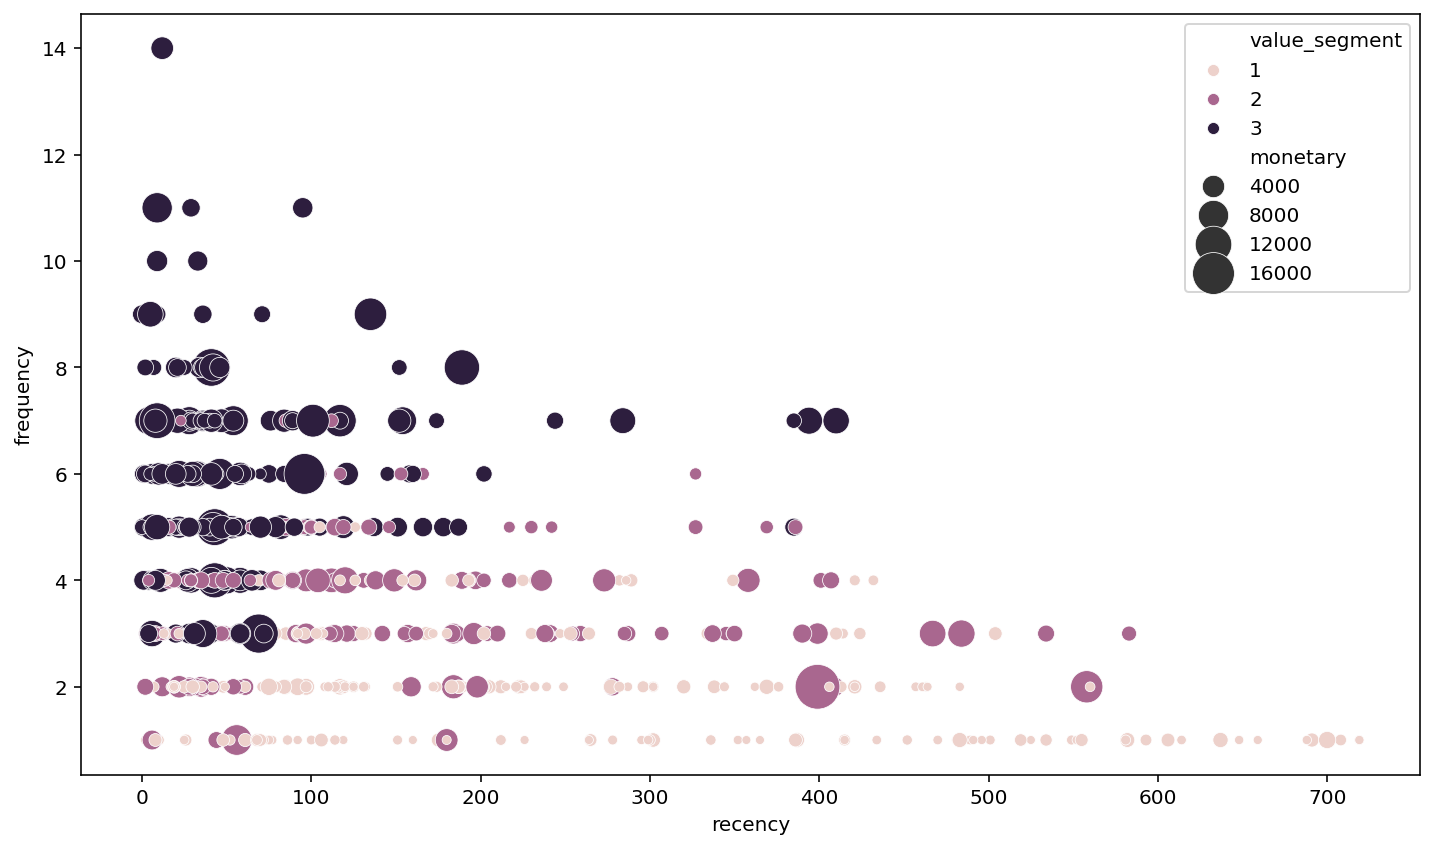

In [37]:
# scatter plot showing distribution of customers' RFM profiles

sns.scatterplot(data=rfm_df , x="recency", y="frequency", size="monetary", hue ="value_segment", sizes =(20,500))

# Plot shows value segment 3 shopped more frequently, recently visited and purchased higher values compared to the other two value segments.

In [38]:
customer_value_count =rfm_df['value_segment'].value_counts()
customer_value_count


value_segment
1    294
3    240
2    239
Name: count, dtype: int64

<Axes: xlabel='value_segment', ylabel='count'>

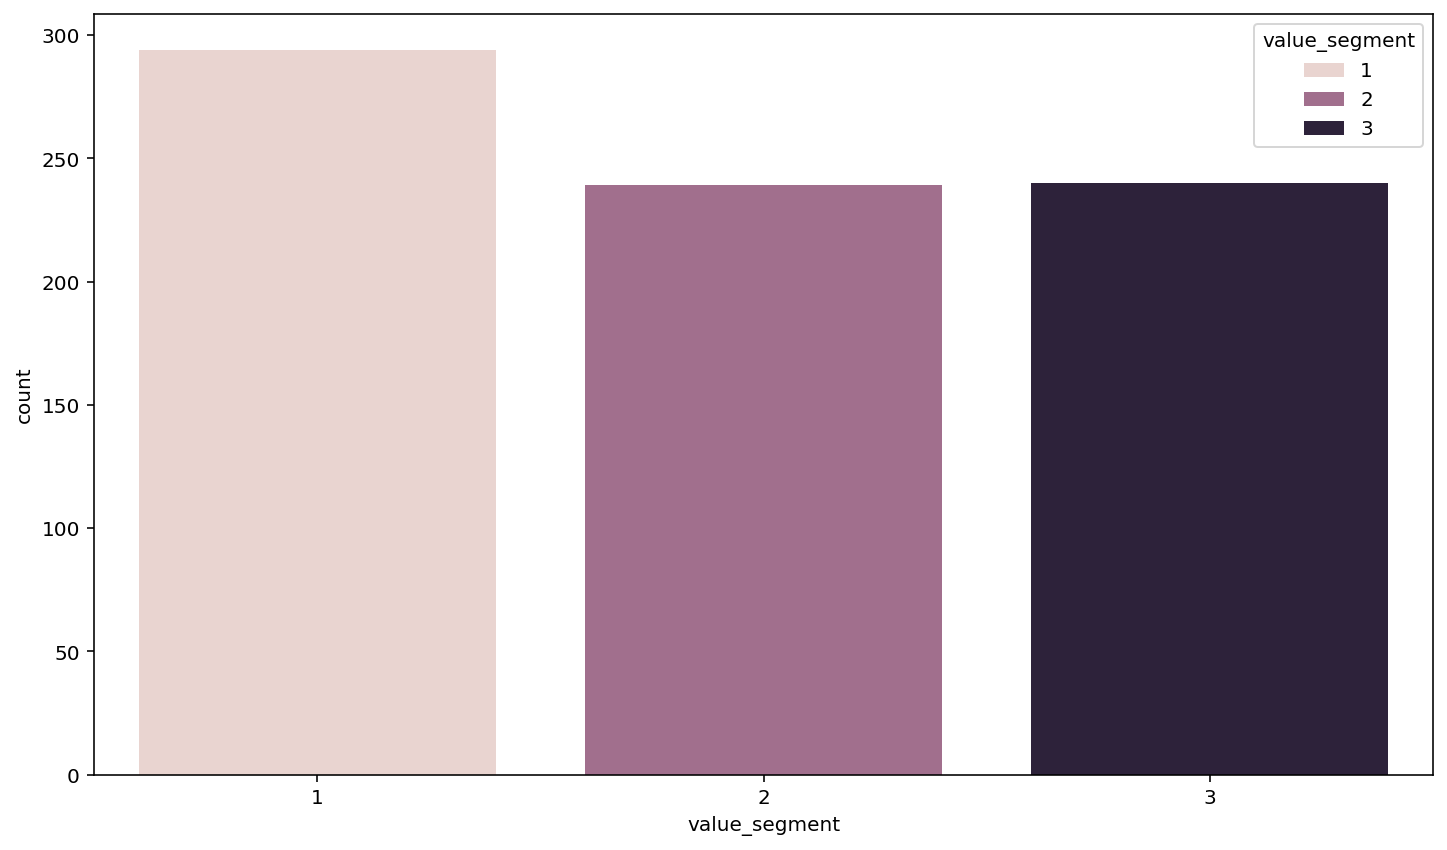

In [39]:
# Distribution of customers by value_segment
# Plot shows there are more customers in the value segment 1 compared to value segments 2 and 3 who have comparable number of customers.

sns.countplot(data=rfm_df , x="value_segment", hue="value_segment")

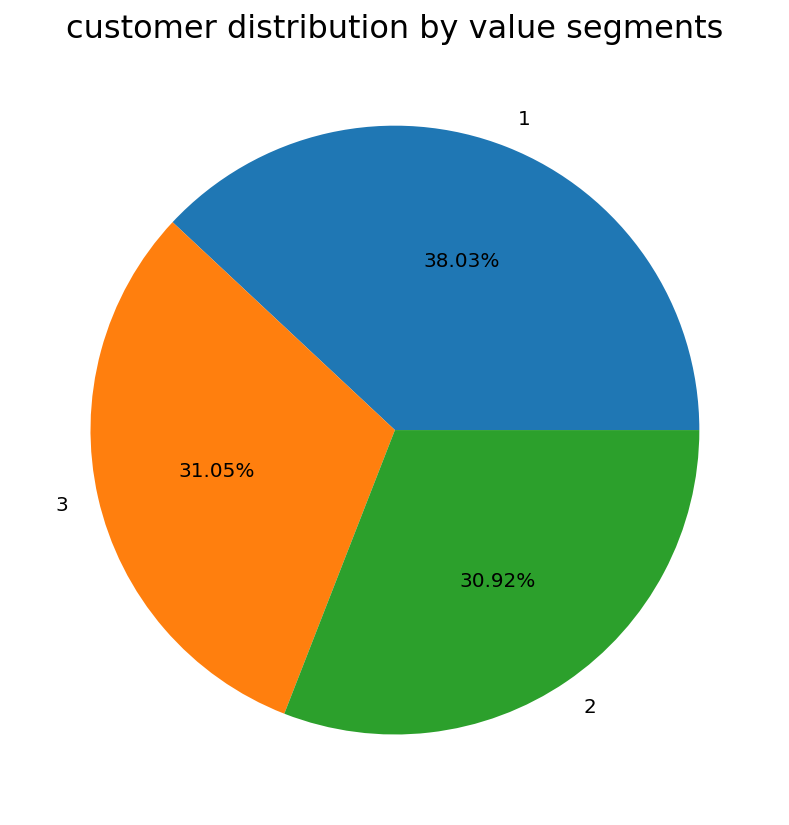

In [40]:
# Percentage distribution of customers by value_segement using a Pie plot
# shows there are more customers in value segment 1, followed by value segment 3 and then value segment 2.

fig, ax = plt.subplots(figsize=(12,7))
ax.pie(customer_value_count.values, labels = customer_value_count.index, autopct= '%.2f%%')
ax.set_title('customer distribution by value segments', fontsize=16)
plt.show()

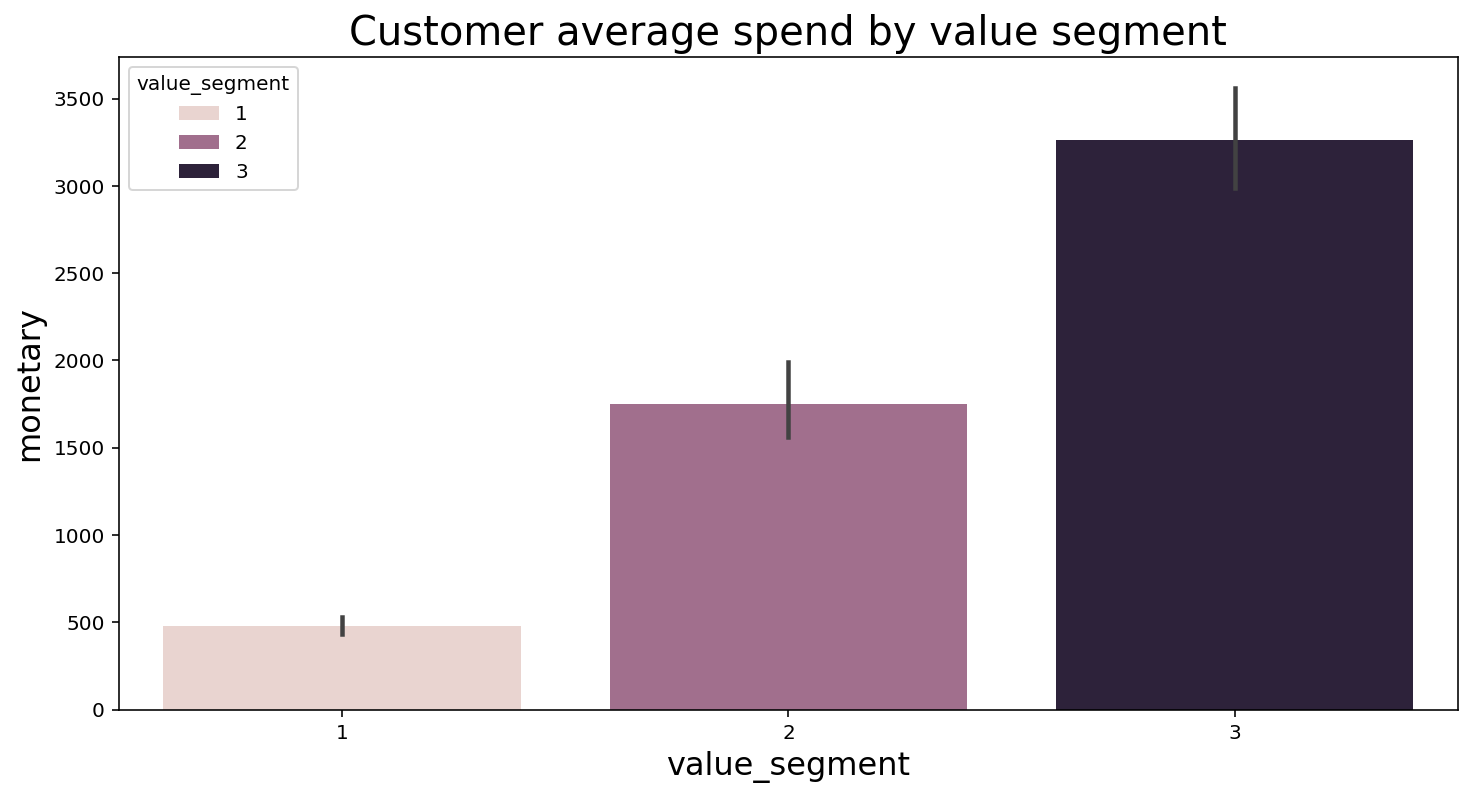

In [41]:
# Barplot showing average spend by value segment

# Plot shows segmnet 3 has a higher average spend,then segment 2 and then segment 1.

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=rfm_df, x='value_segment', y='monetary', estimator=np.mean, hue= 'value_segment' )
ax.set_xlabel('value_segment', fontsize=16)
ax.set_ylabel('monetary', fontsize=16)
ax.set_title('Customer average spend by value segment', fontsize=20)
plt.show()


<Axes: xlabel='value_segment', ylabel='monetary'>

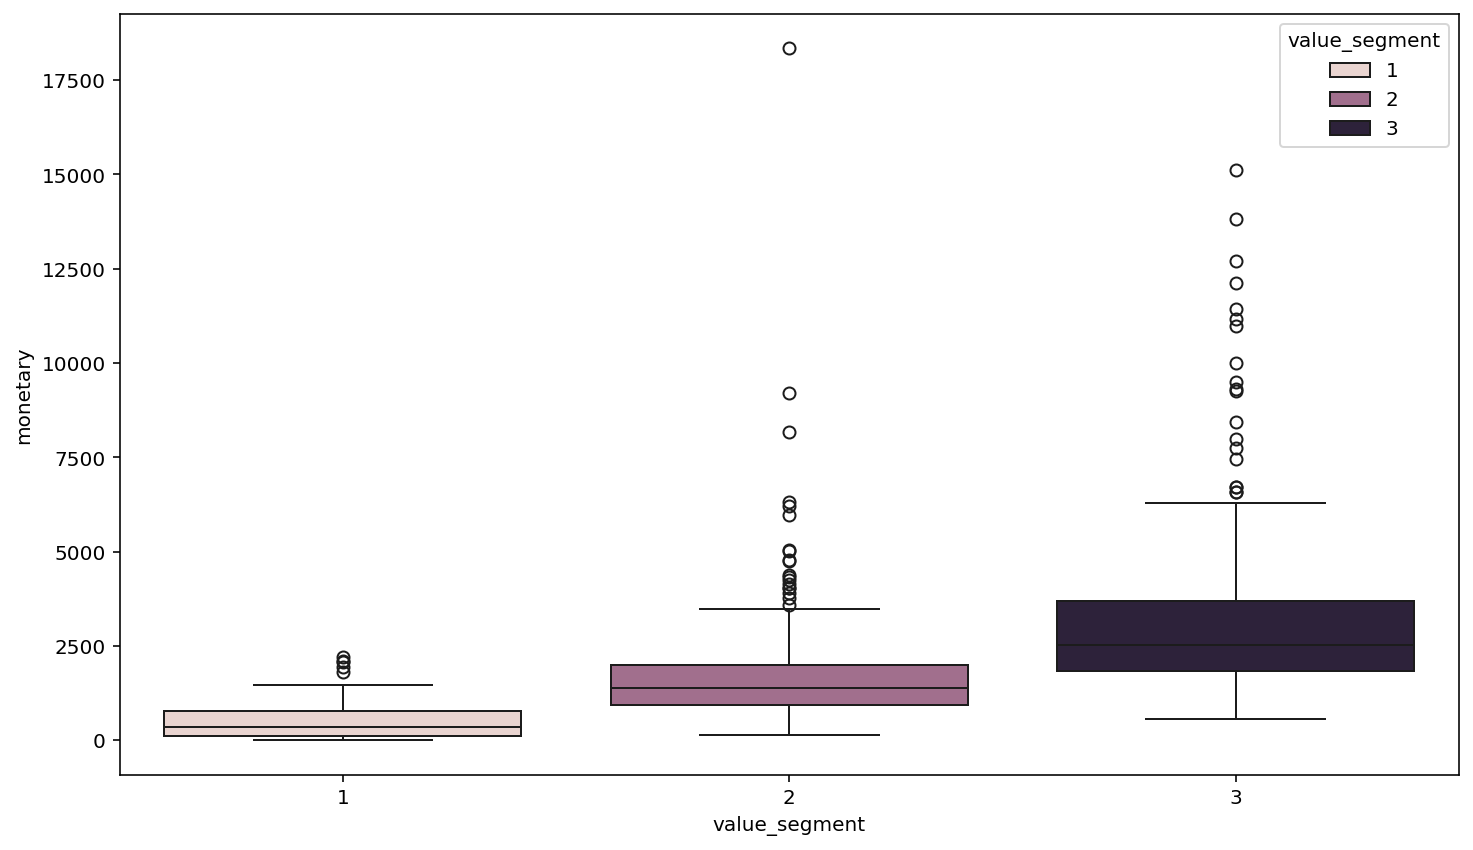

In [42]:
# Boxplot showing distribution of money spent by value 

# Deviation shows a wide range between the mean monetary purchase and individual customers purchase in segments 3 and 2. Most of the customers in segment 1 buy values close to the mean purcahse for thr group.

sns.boxplot(data=rfm_df, x="value_segment", y="monetary", hue="value_segment")


<Axes: xlabel='value_segment', ylabel='recency'>

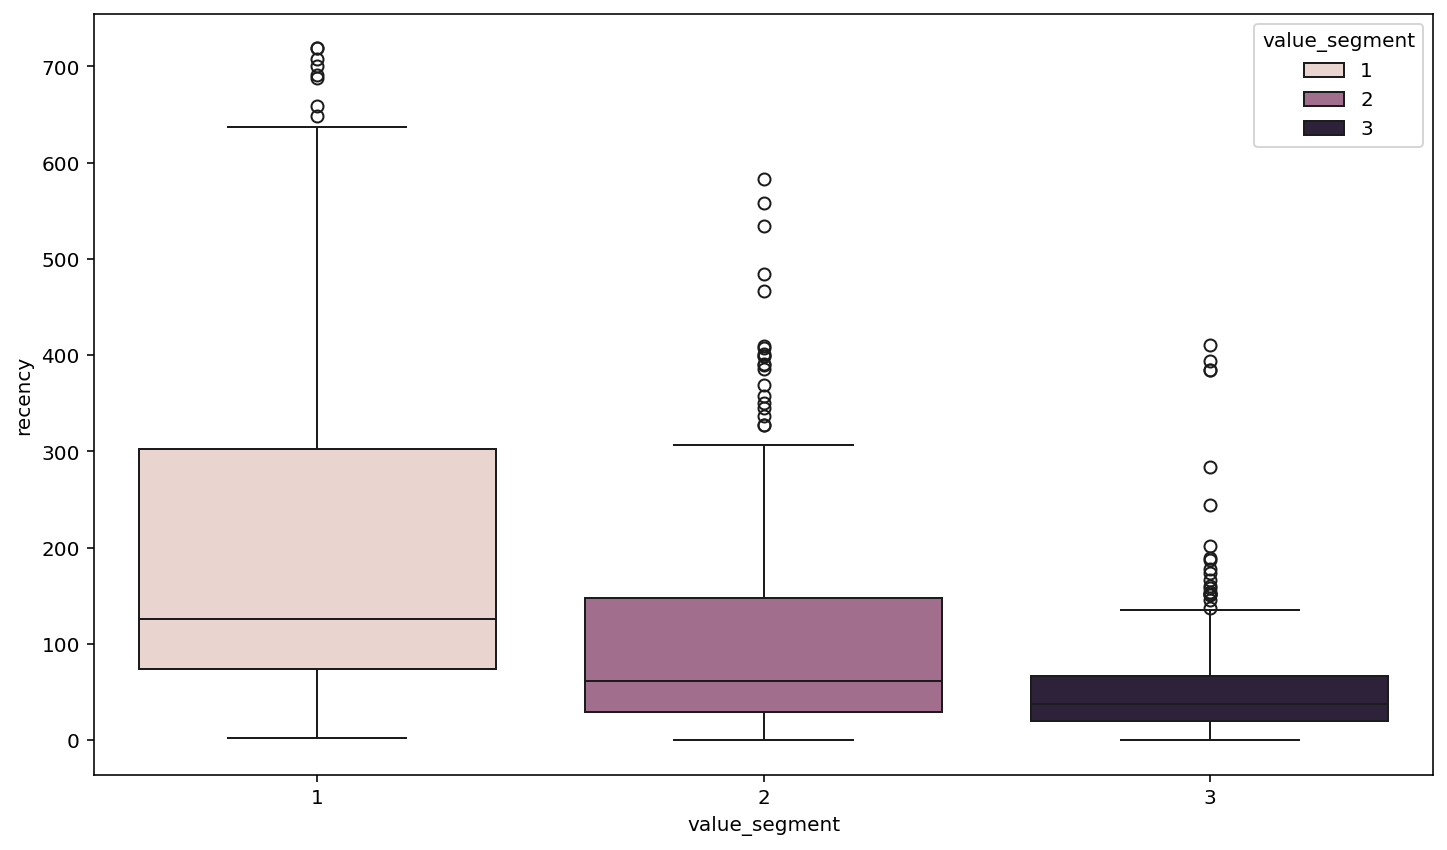

In [43]:
# Boxplot showing distribution recency by value segment

# Deviation shows a wide range between the mean recency and individual customers visit in segments 1 and 2. Most of the customers in segment 3 visited the store more recently.


sns.boxplot(data=rfm_df, x="value_segment", y="recency", hue="value_segment")

<Axes: xlabel='value_segment', ylabel='frequency'>

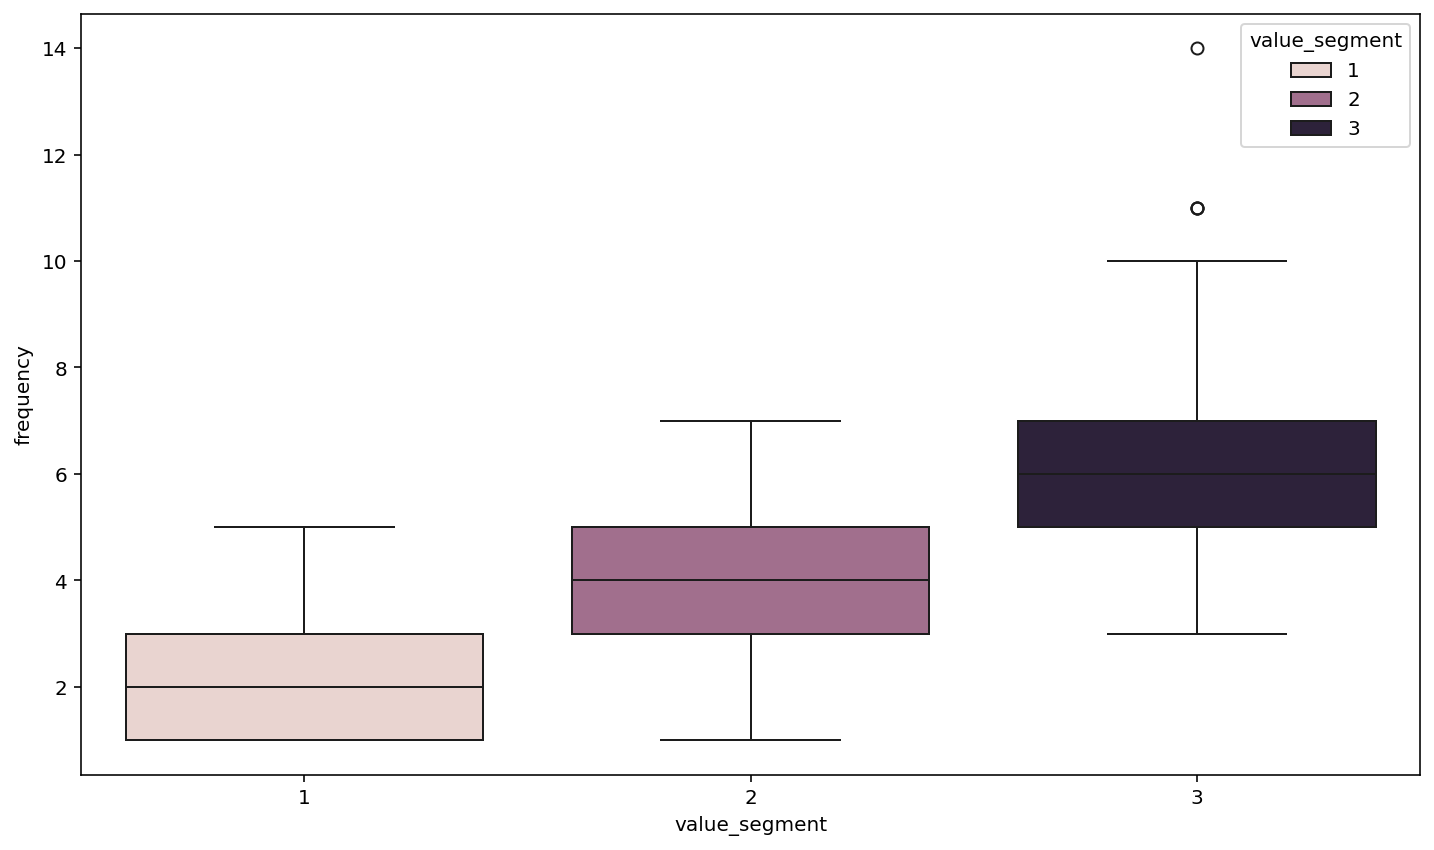

In [44]:
# Boxplot of distribution of Transaction Frequency by value_segment
# Boxplot of Transaction Frequency by value_segment

sns.boxplot(data=rfm_df, x="value_segment", y="frequency", hue="value_segment")

In [45]:
# Assigning labels to value segments. 

segment_name_mapping = {3 : 'Champions', 2 : 'Loyalists', 1 : 'At Risk'}

rfm_df['segment_label'] = rfm_df['value_segment'].map(segment_name_mapping)
rfm_df

,recency,frequency,monetary,m_score,r_score,f_score,rfm_score,value_segment,segment_label
Customer ID,,,,,,,,,
AA-10315,184,2,4780.552,4,1,1,2.2,2,Loyalists
AA-10375,19,4,737.020,2,4,2,2.4,2,Loyalists
AA-10480,259,3,1763.052,3,1,2,2.2,2,Loyalists
AA-10645,55,3,1681.145,3,3,2,2.6,2,Loyalists
AB-10015,415,1,563.940,2,1,1,1.4,1,At Risk
...,...,...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,3,4,3.4,3,Champions
YC-21895,4,3,2322.160,4,4,2,3.2,3,Champions
YS-21880,9,5,5340.264,4,4,3,3.6,3,Champions


In [46]:
# Assigning cash reward offers to customers based on their value_segment label

reward_offer_map = {'Champions' : 300, 'Loyalists' : 200, 'At Risk' : 50}

rfm_df['reward_offer'] = rfm_df['segment_label'].map(reward_offer_map )
rfm_df

,recency,frequency,monetary,m_score,r_score,f_score,rfm_score,value_segment,segment_label,reward_offer
Customer ID,,,,,,,,,,
AA-10315,184,2,4780.552,4,1,1,2.2,2,Loyalists,200
AA-10375,19,4,737.020,2,4,2,2.4,2,Loyalists,200
AA-10480,259,3,1763.052,3,1,2,2.2,2,Loyalists,200
AA-10645,55,3,1681.145,3,3,2,2.6,2,Loyalists,200
AB-10015,415,1,563.940,2,1,1,1.4,1,At Risk,50
...,...,...,...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,3,4,3.4,3,Champions,300
YC-21895,4,3,2322.160,4,4,2,3.2,3,Champions,300
YS-21880,9,5,5340.264,4,4,3,3.6,3,Champions,300


In [47]:
# Saving the final rfm_df dataframe
rfm_df.to_excel('RFM_Final_Output.xlsx')

###### **Adding RFM Variables to Original Dataset for more Insights**

In [48]:
# Adding the RFM Value Segment labels to the obs_df transaction data that was originally used for performing the RFM analysis. 
# obs_df['Customer ID'].apply(lambda x : rfm_df.loc[x, 'segment_label'])

obs_df['segment_label'] = obs_df['Customer ID'].map(rfm_df['segment_label'])
obs_df

/tmp/ipykernel_227/3734300488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df['segment_label'] = obs_df['Customer ID'].map(rfm_df['segment_label'])


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,segment_label
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,At Risk
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,At Risk
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,Loyalists
12,13,CA-2017-114412,2017-04-15,4/20/2017,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,Loyalists
13,14,CA-2016-161389,2016-12-05,12/10/2016,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,CA-2017-163629,2017-11-17,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470,Loyalists
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,Champions
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,Champions
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,Champions


In [49]:
obs_df['value_segment'] = obs_df['Customer ID'].map(rfm_df['value_segment'])
obs_df

/tmp/ipykernel_227/2696377151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df['value_segment'] = obs_df['Customer ID'].map(rfm_df['value_segment'])


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,segment_label,value_segment
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,At Risk,1
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,At Risk,1
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,Loyalists,2
12,13,CA-2017-114412,2017-04-15,4/20/2017,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,Loyalists,2
13,14,CA-2016-161389,2016-12-05,12/10/2016,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,At Risk,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,CA-2017-163629,2017-11-17,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470,Loyalists,2
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,Champions,3
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,Champions,3
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,Champions,3


In [50]:
# Distribution of number of customers in each rfm value segment

obs_df['segment_label'].value_counts()

segment_label
Champions    2966
Loyalists    1782
At Risk      1162
Name: count, dtype: int64

In [51]:
obs_df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,segment_label,value_segment
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,At Risk,1
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,At Risk,1
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,Loyalists,2


### **Product Category Analysis**



In [52]:
Unit_cost= obs_df['Sales']/obs_df['Quantity']
Unit_cost 
obs_df['Unit_cost']=Unit_cost
obs_df

/tmp/ipykernel_227/2591032609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df['Unit_cost']=Unit_cost


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,segment_label,value_segment,Unit_cost
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,At Risk,1,130.980
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,At Risk,1,243.980
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,Loyalists,2,7.310
12,13,CA-2017-114412,2017-04-15,4/20/2017,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,Loyalists,2,5.184
13,14,CA-2016-161389,2016-12-05,12/10/2016,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,At Risk,1,135.992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,CA-2017-163629,2017-11-17,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470,Loyalists,2,41.220
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,Champions,3,45.980
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,Champions,3,129.288
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,Champions,3,7.400


<Axes: xlabel='Category', ylabel='count'>

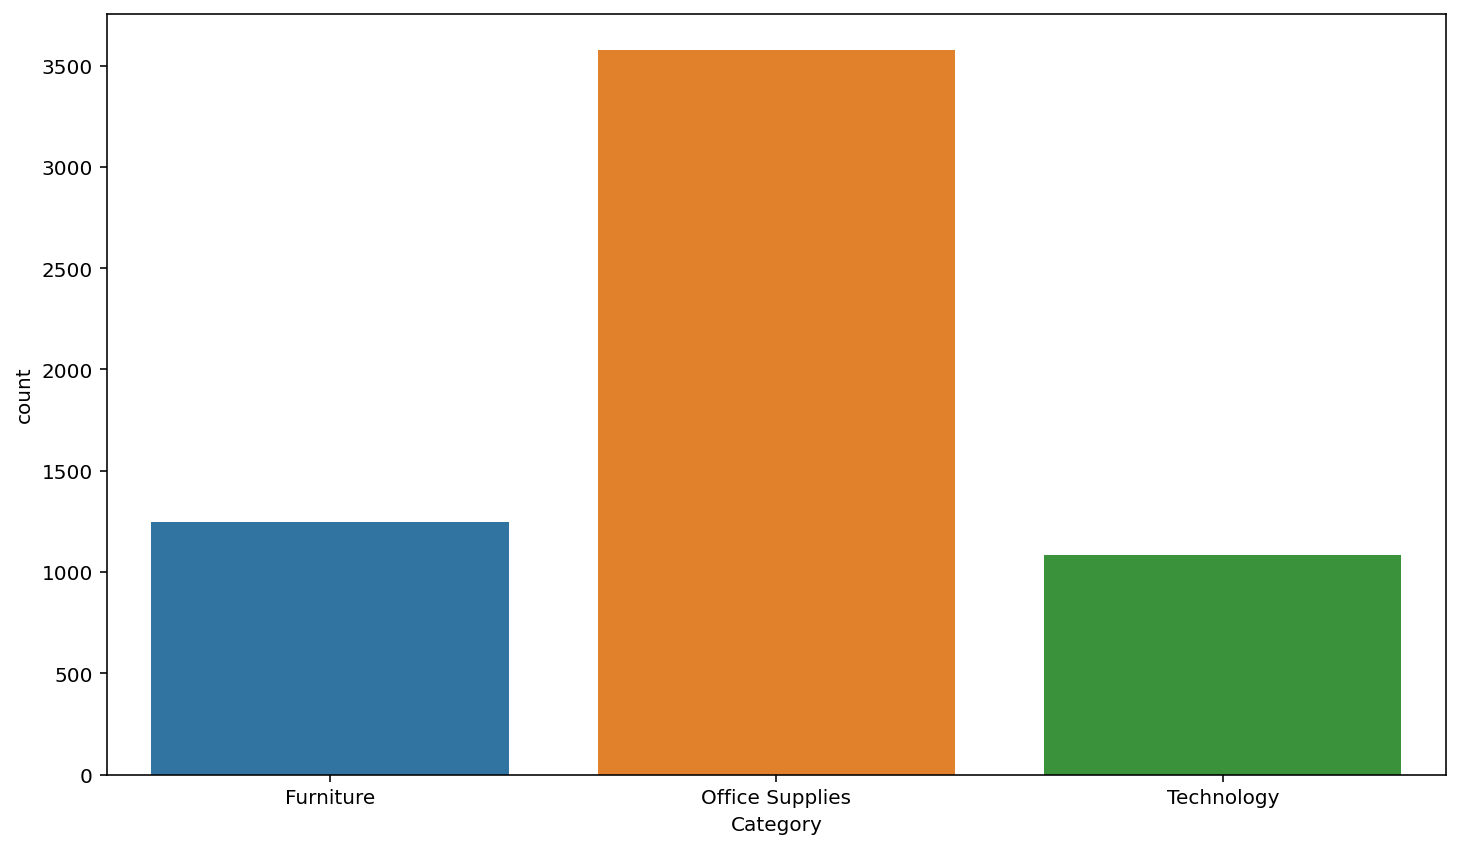

In [53]:
# Countplot showing the number of transactions by Product Category.
#shows the most shopped category is the office supplies,followed by furniture which is somewhat comparable with technology category.

sns.countplot(data=obs_df , x="Category", hue="Category")

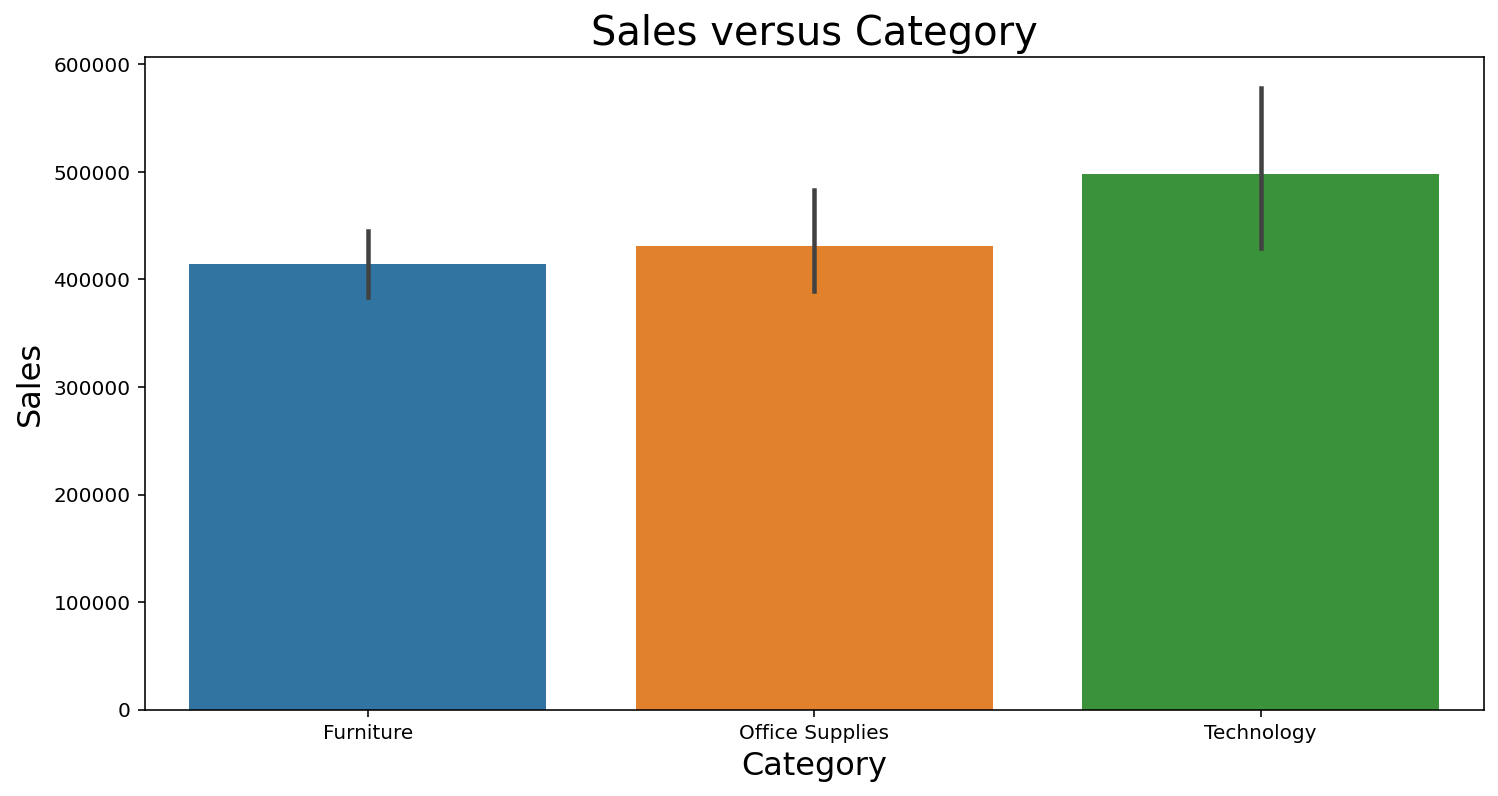

In [54]:
# To chcek the Product Category with the largest total amount of Sales
# Shows technology category has the highest sales amount,then office supplies, then furnitures.

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Category', y='Sales', estimator=np.sum, hue = "Category")
ax.set_xlabel('Category', fontsize=16)
ax.set_ylabel('Sales', fontsize=16)
ax.set_title('Sales versus Category', fontsize=20)
plt.show()


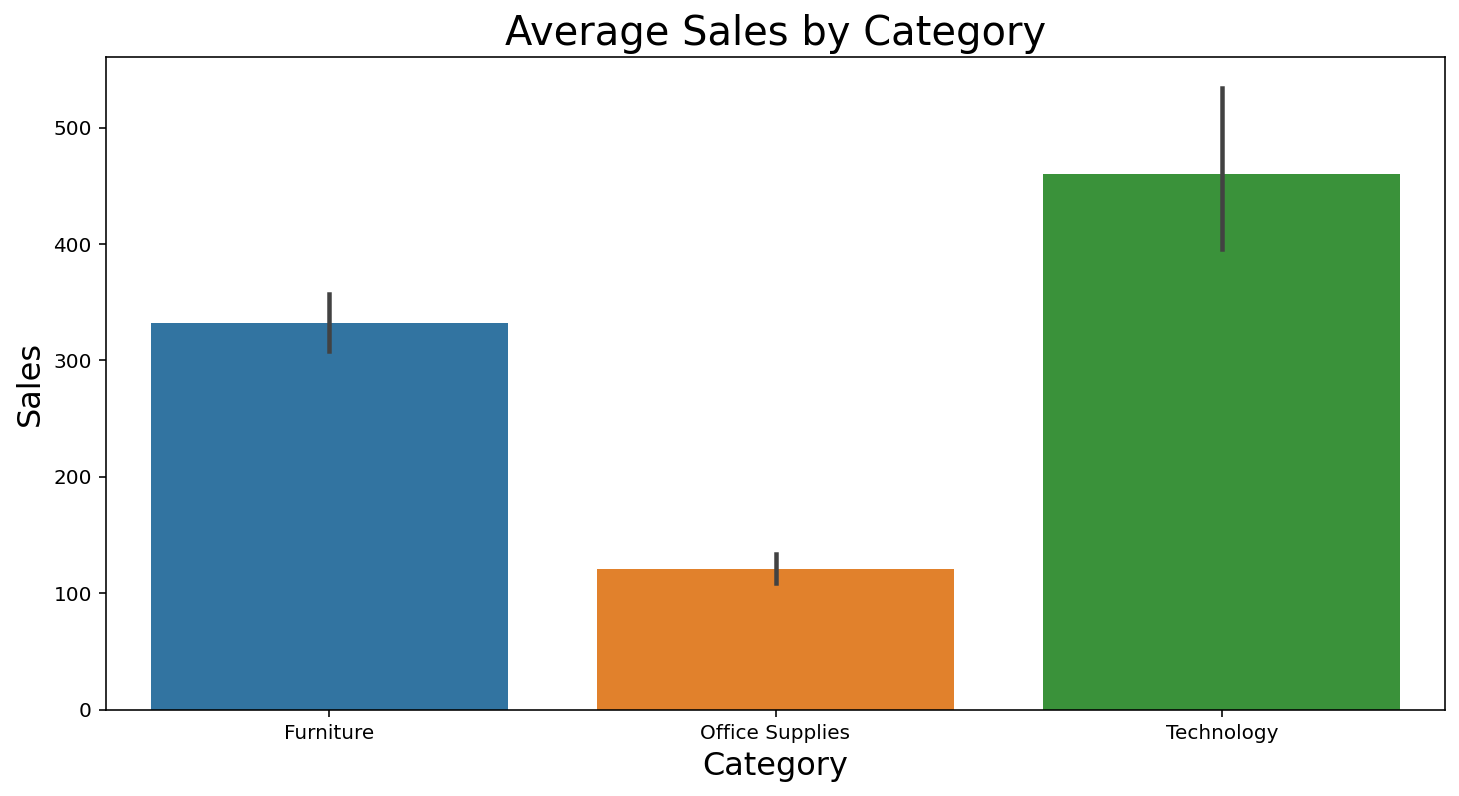

In [55]:
# Product Category with highest average Sales
# Technology category has the highest average sales, then furnitures then office supplies.

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Category', y='Sales', estimator=np.mean, hue = "Category")
ax.set_xlabel('Category', fontsize=16)
ax.set_ylabel('Sales', fontsize=16)
ax.set_title('Average Sales by Category', fontsize=20)
plt.show()

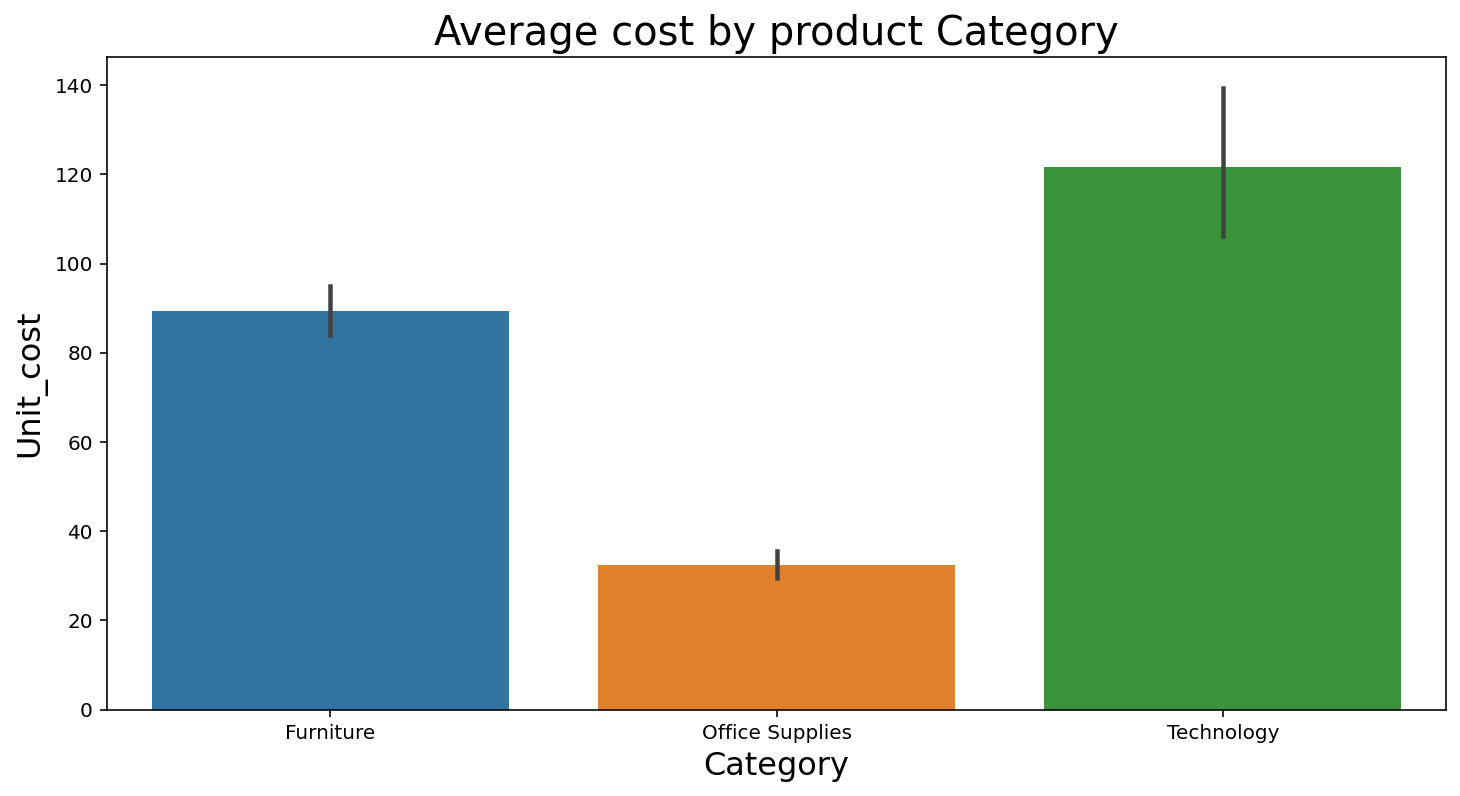

In [56]:
# Average cost of each Product Category Item
# Shows the average cost of items in technology category is around $120. Candle stick also shows deviation of each item in the category is wider compared to other categories that have closer deviation of each item from the mean.  

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Category', y='Unit_cost',estimator =np.mean, hue = "Category")
ax.set_xlabel('Category', fontsize=16)
ax.set_ylabel('Unit_cost', fontsize=16)
ax.set_title('Average cost by product Category', fontsize=20)
plt.show()

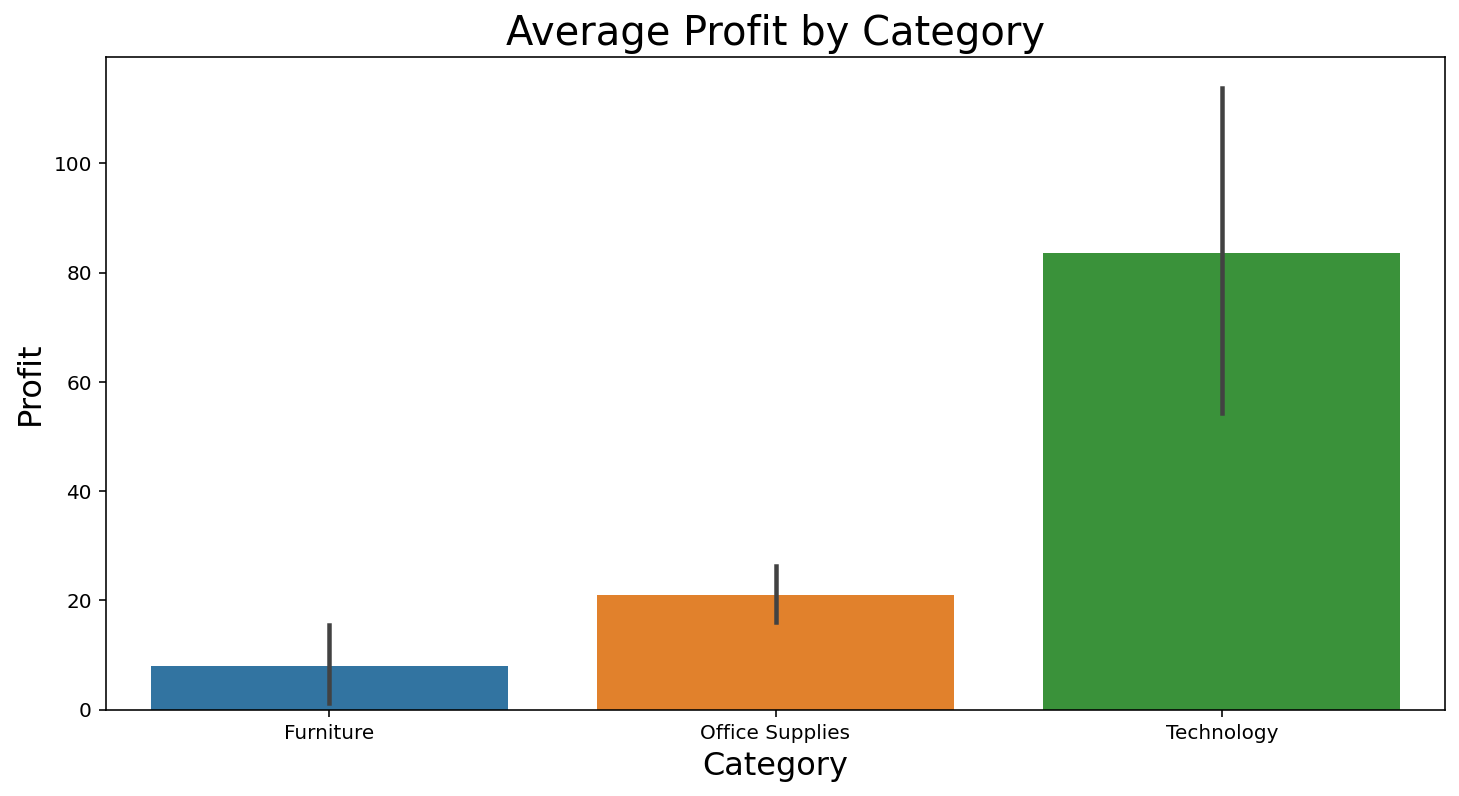

In [57]:
# to determine the most profitable Product Category.
# Technology category is the most profitable, followed by office supplies and then the furniture category.

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Category', y='Profit', estimator=np.mean, hue = "Category")
ax.set_xlabel('Category', fontsize=16)
ax.set_ylabel('Profit', fontsize=16)
ax.set_title('Average Profit by Category', fontsize=20)
plt.show()


<Axes: xlabel='segment_label', ylabel='count'>

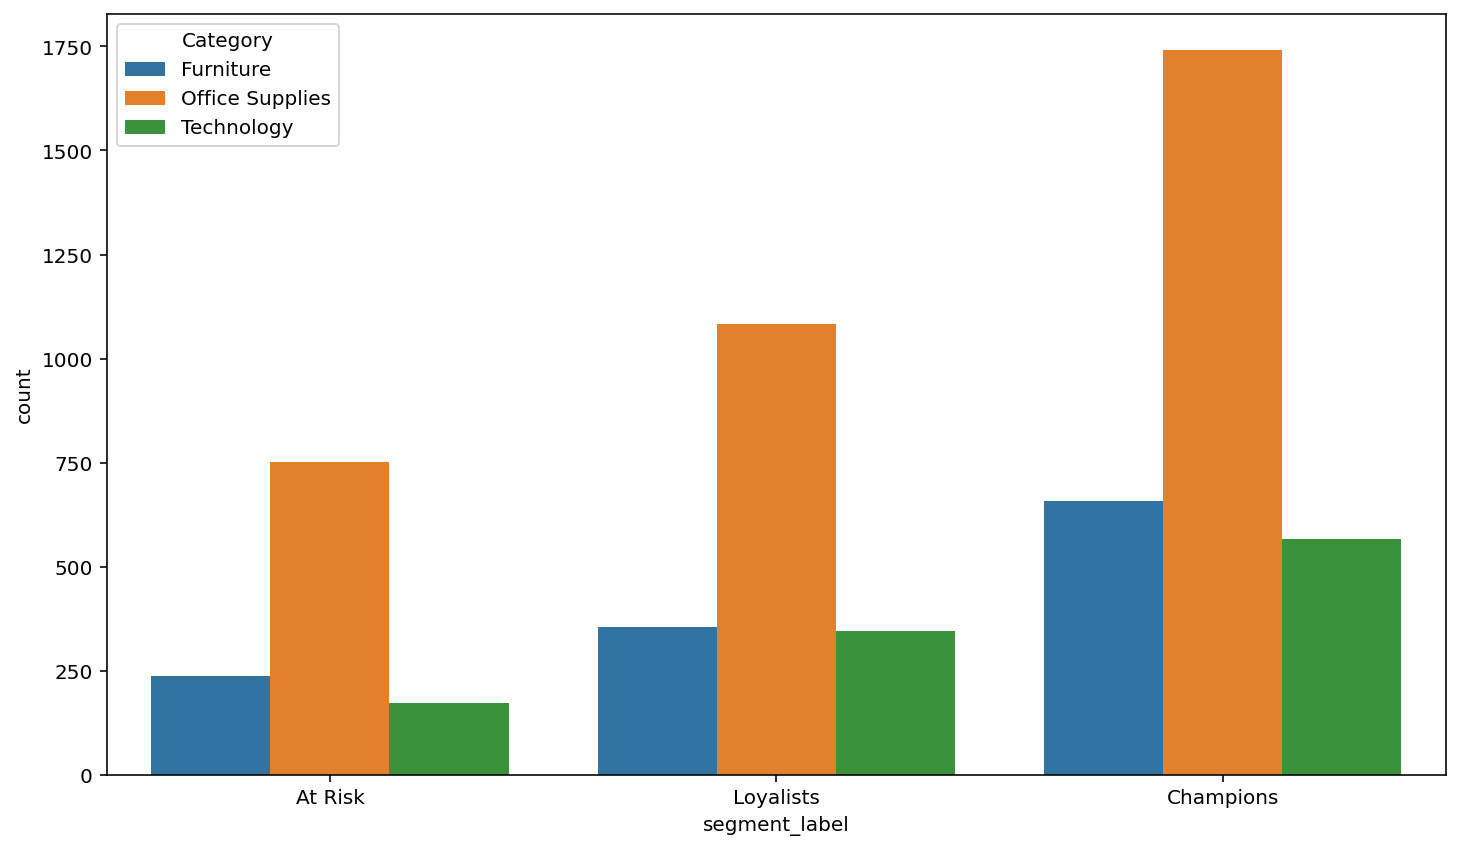

In [58]:
# Most shopped Product Category by rfm Value Segment


sns.countplot(data=obs_df , x="segment_label", hue="Category")

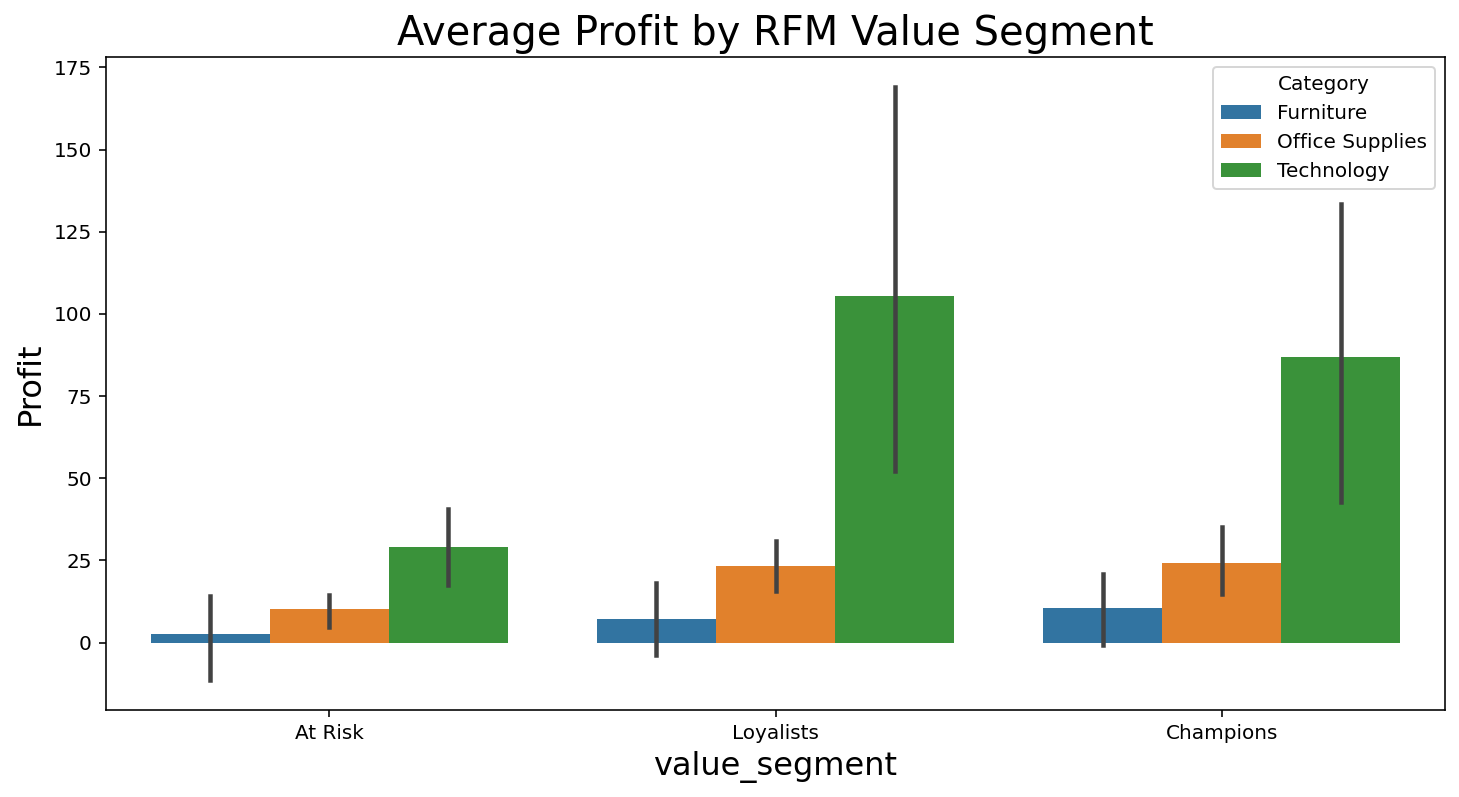

In [59]:
# Average profit by rfm value segment in each product category
# In all value segments, technology category gives the hihest average profit,followed by office supplies and then the furniture category. there's an observable wider deviation from the mean in the technology category compared to the other categories

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='segment_label', y='Profit', estimator=np.mean, hue = "Category")
ax.set_xlabel('value_segment', fontsize=16)
ax.set_ylabel('Profit', fontsize=16)
ax.set_title('Average Profit by RFM Value Segment', fontsize=20)
plt.show()

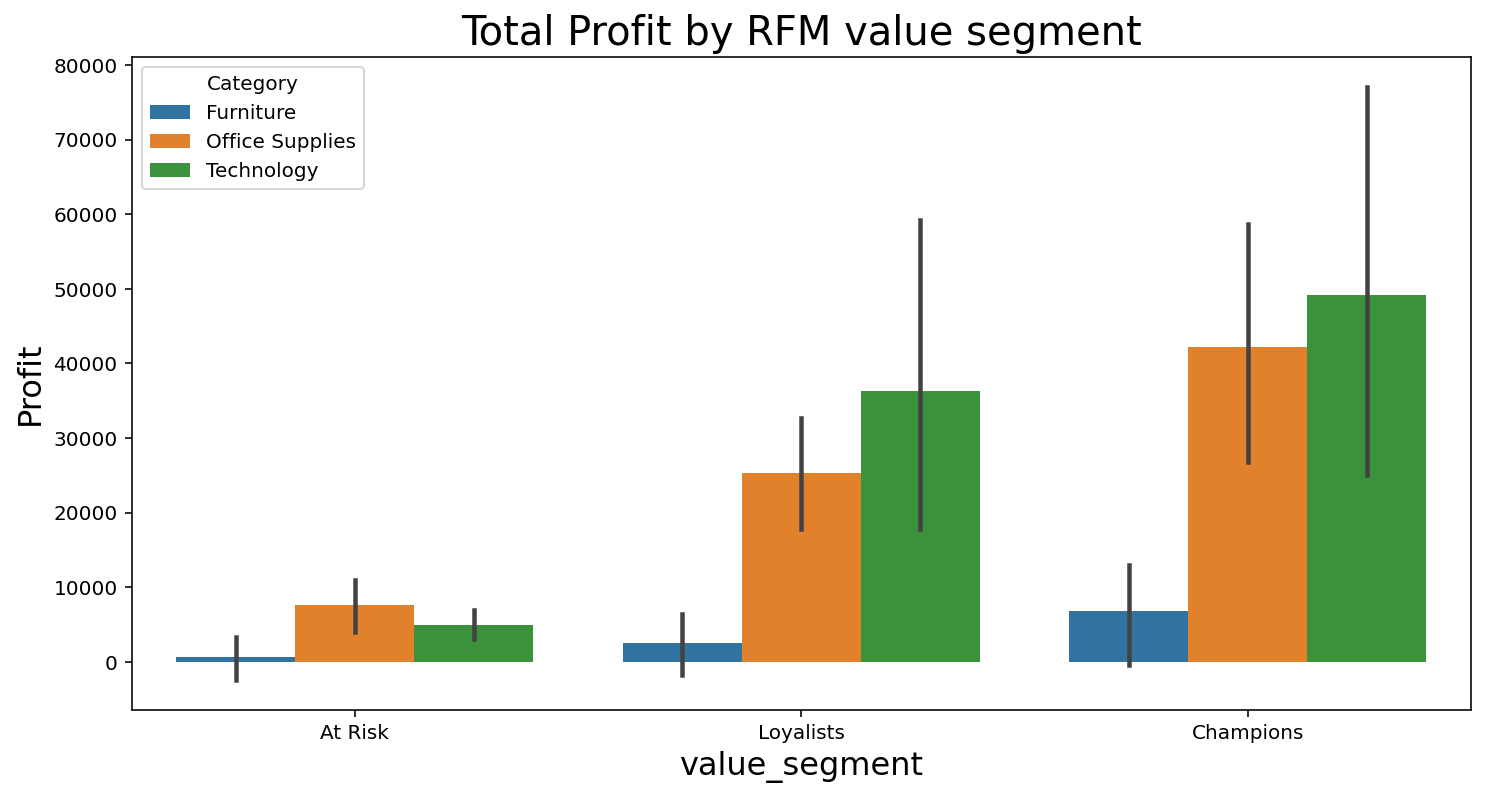

In [60]:
# Barplot of total profit by rfm value segment in each product category
# similar to what is observed in the plot above, technologu category has the highest total profit in each value segment.

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='segment_label', y='Profit', estimator=np.sum, hue = "Category")
ax.set_xlabel('value_segment', fontsize=16)
ax.set_ylabel('Profit', fontsize=16)
ax.set_title('Total Profit by RFM value segment', fontsize=20)
plt.show()

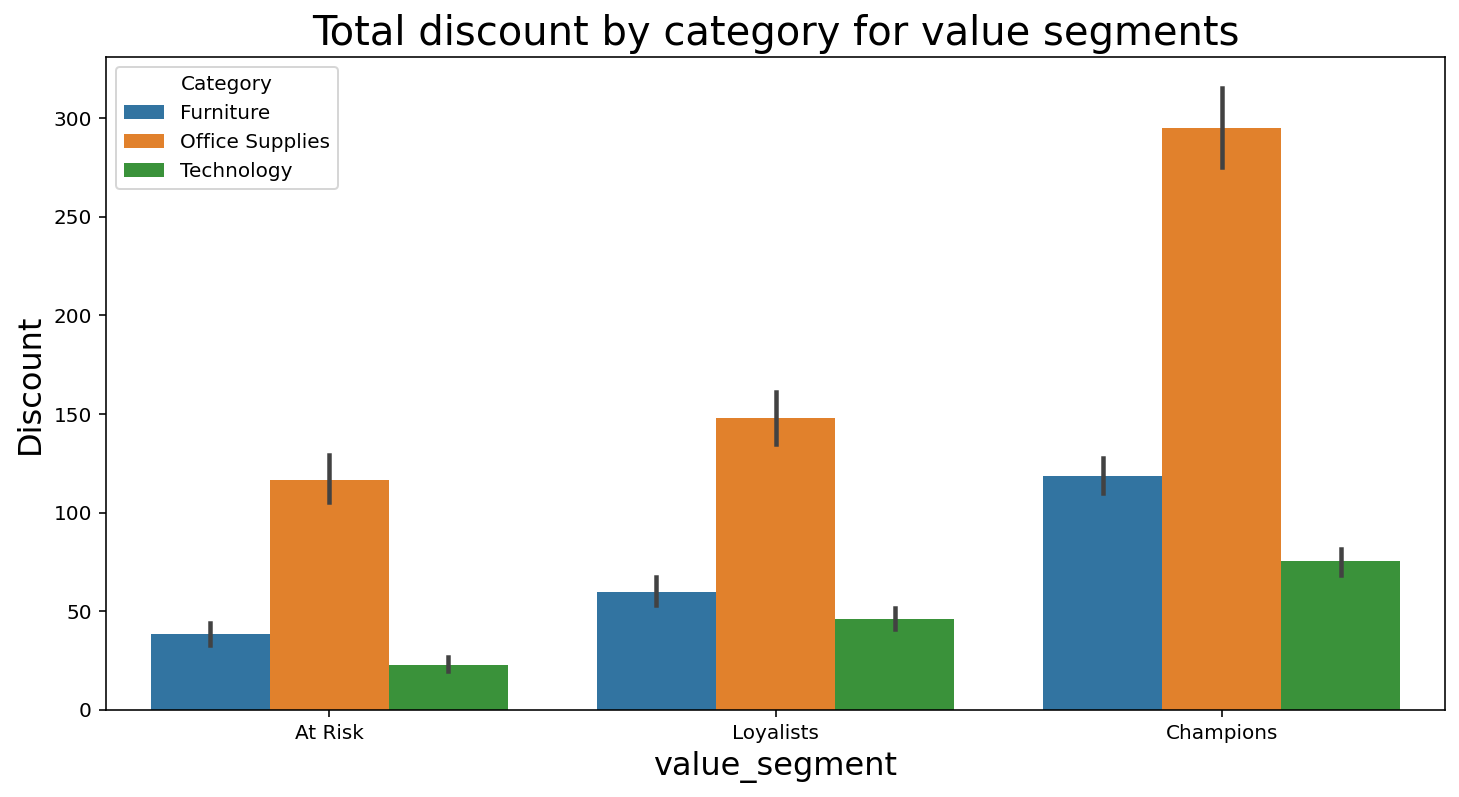

In [61]:
# To check the total amount of discounts by rfm value segment in each product category
# Although the office supplies category isnt the most profitable category, it is the category where shoppers have had the highest amounts of total discoount across all value segments followed by office furnitures, the most profitable category which is the technology category is the least dicounted category to shoppers.

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='segment_label', y='Discount', estimator=np.sum, hue = "Category")
ax.set_xlabel('value_segment', fontsize=16)
ax.set_ylabel('Discount', fontsize=16)
ax.set_title('Total discount by category for value segments', fontsize=20)
plt.show()

### Ship Mode Analysis

<Axes: xlabel='segment_label', ylabel='count'>

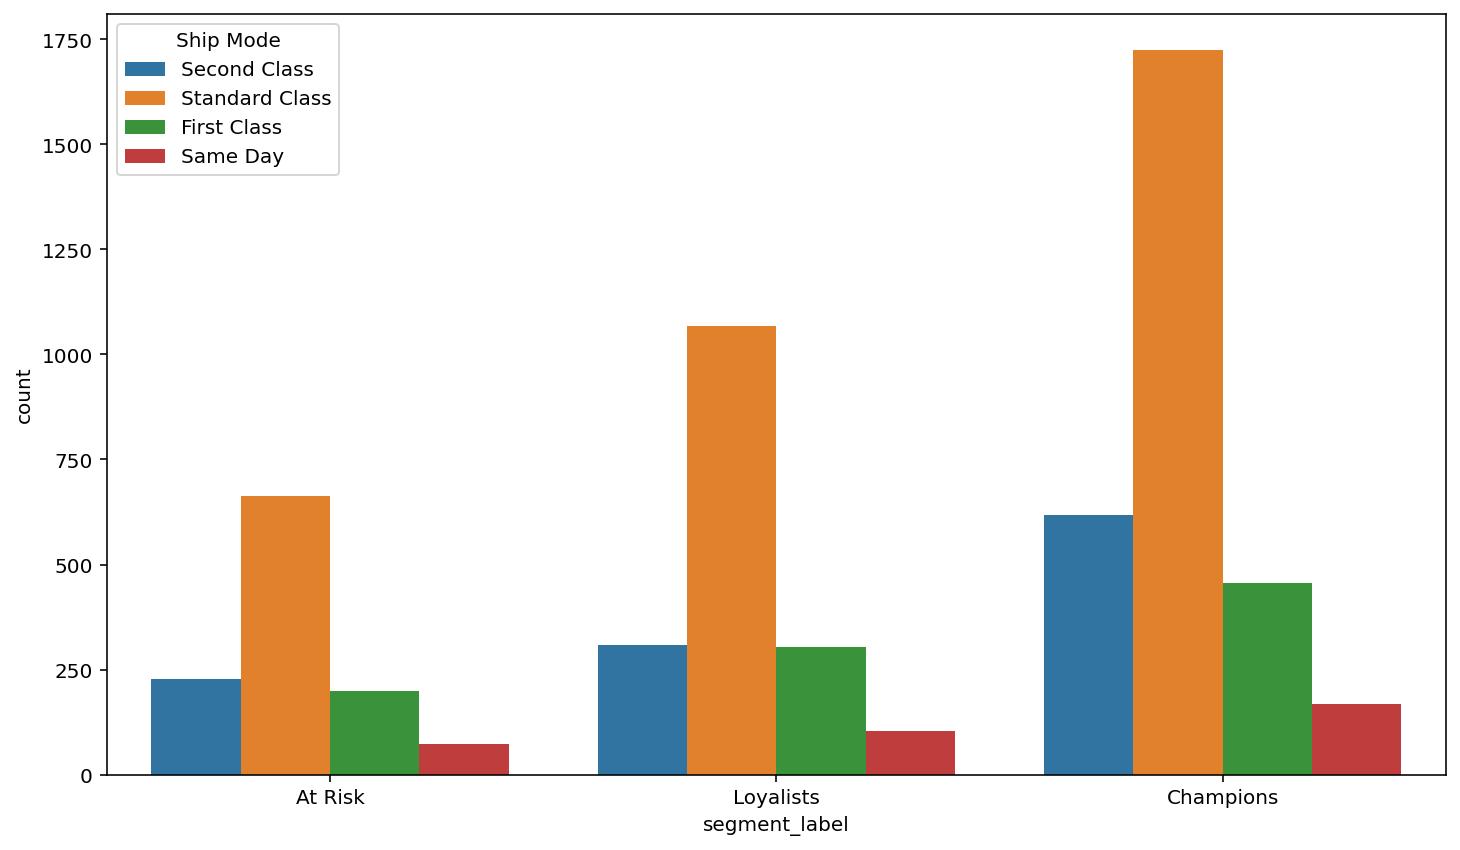

In [62]:
# Count plot showing which shipping mode is the most frequently used across rfm value segments.
# The standard class is the most frequently used ship mode across all value segments, followed by first and second class shipping modes who have comparable patronages. Same day delivery is the least used ship mode across all value segments.

sns.countplot(data=obs_df, x="segment_label", hue="Ship Mode")

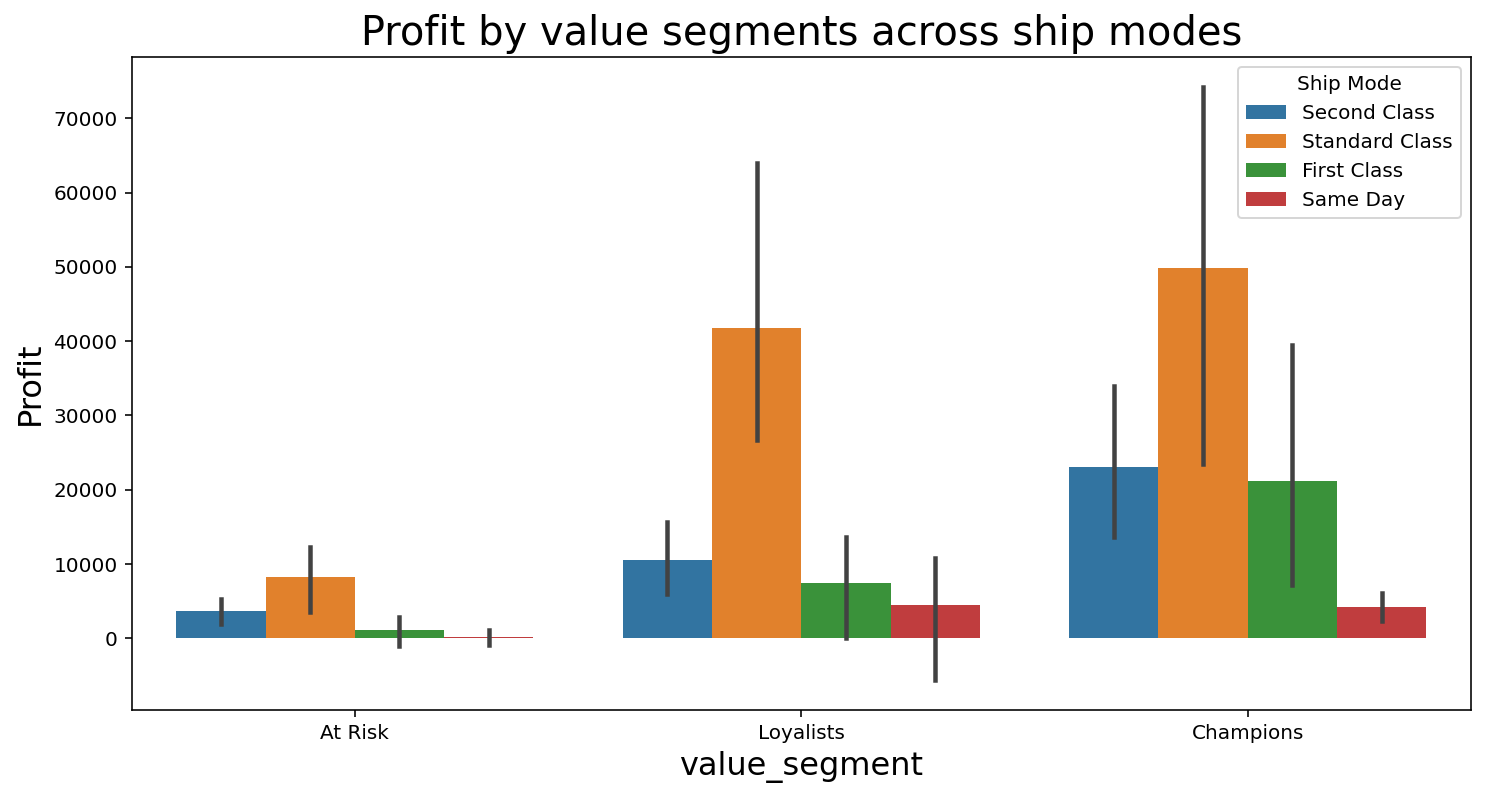

In [63]:
# Barplot showing a breakdown of Total Profit by rfm value_segment across all Ship Modes
# Plot indicates the champions have the highest total profits with standard class being the mostly used ship mode amongst all the value segments and the same day ship category being the least used.  

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='segment_label', y='Profit', estimator=np.sum, hue = "Ship Mode")
ax.set_xlabel('value_segment', fontsize=16)
ax.set_ylabel('Profit', fontsize=16)
ax.set_title( 'Profit by value segments across ship modes', fontsize=20)
plt.show()

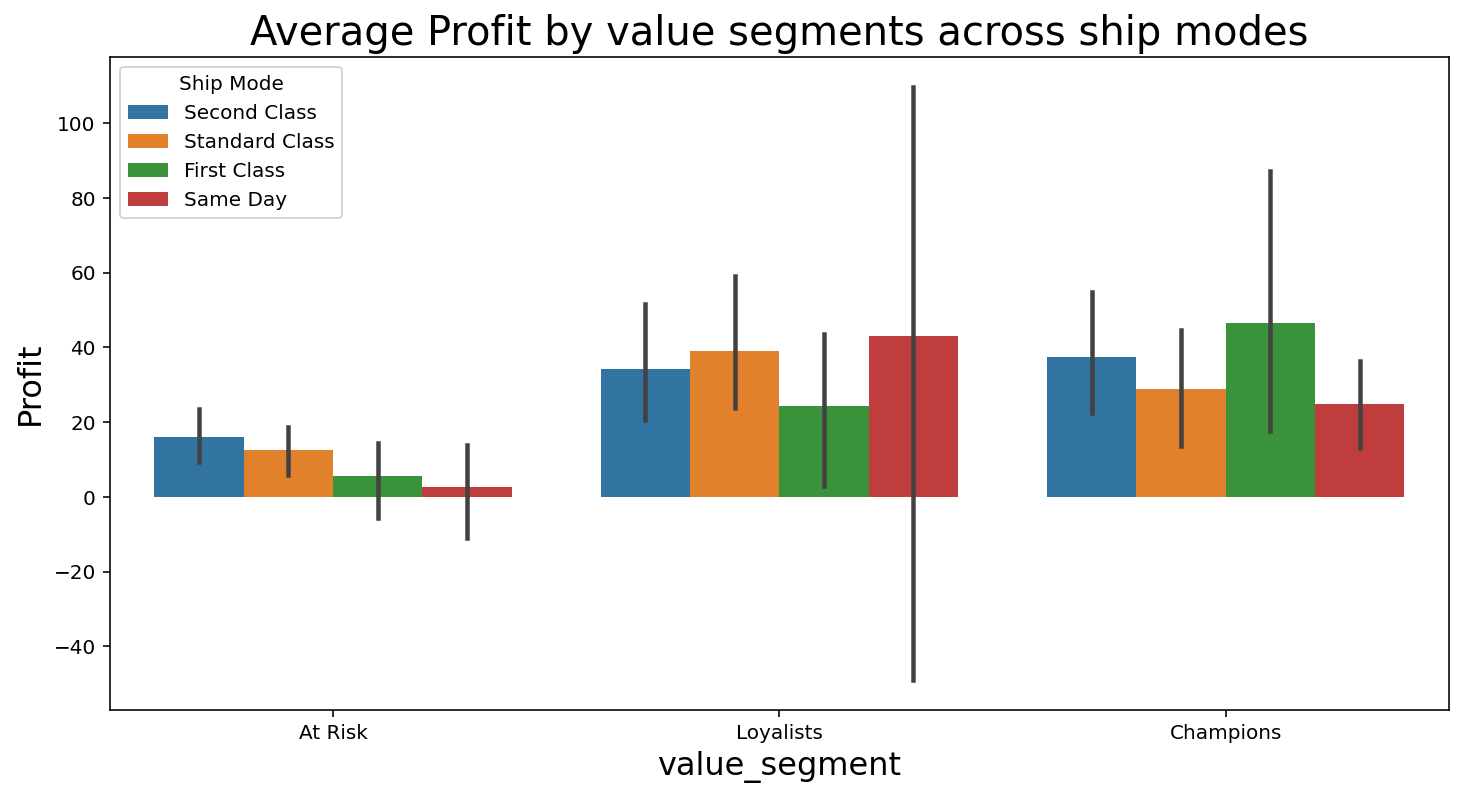

In [64]:
# Breakdown of Average Profit by rfm value_segment across all Ship Modes.
# Amongst the Loyalist and Champions groups, the First and standard class ship modes have the highest average profits.

# Barplot of Proft vs. value_segment with estimaton=np.mean and hue='Ship Mode'

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='segment_label', y='Profit', estimator=np.mean, hue = "Ship Mode")
ax.set_xlabel('value_segment', fontsize=16)
ax.set_ylabel('Profit', fontsize=16)
ax.set_title( 'Average Profit by value segments across ship modes', fontsize=20)
plt.show()

### **Customer Segment Analysis**

<Axes: xlabel='Segment', ylabel='count'>

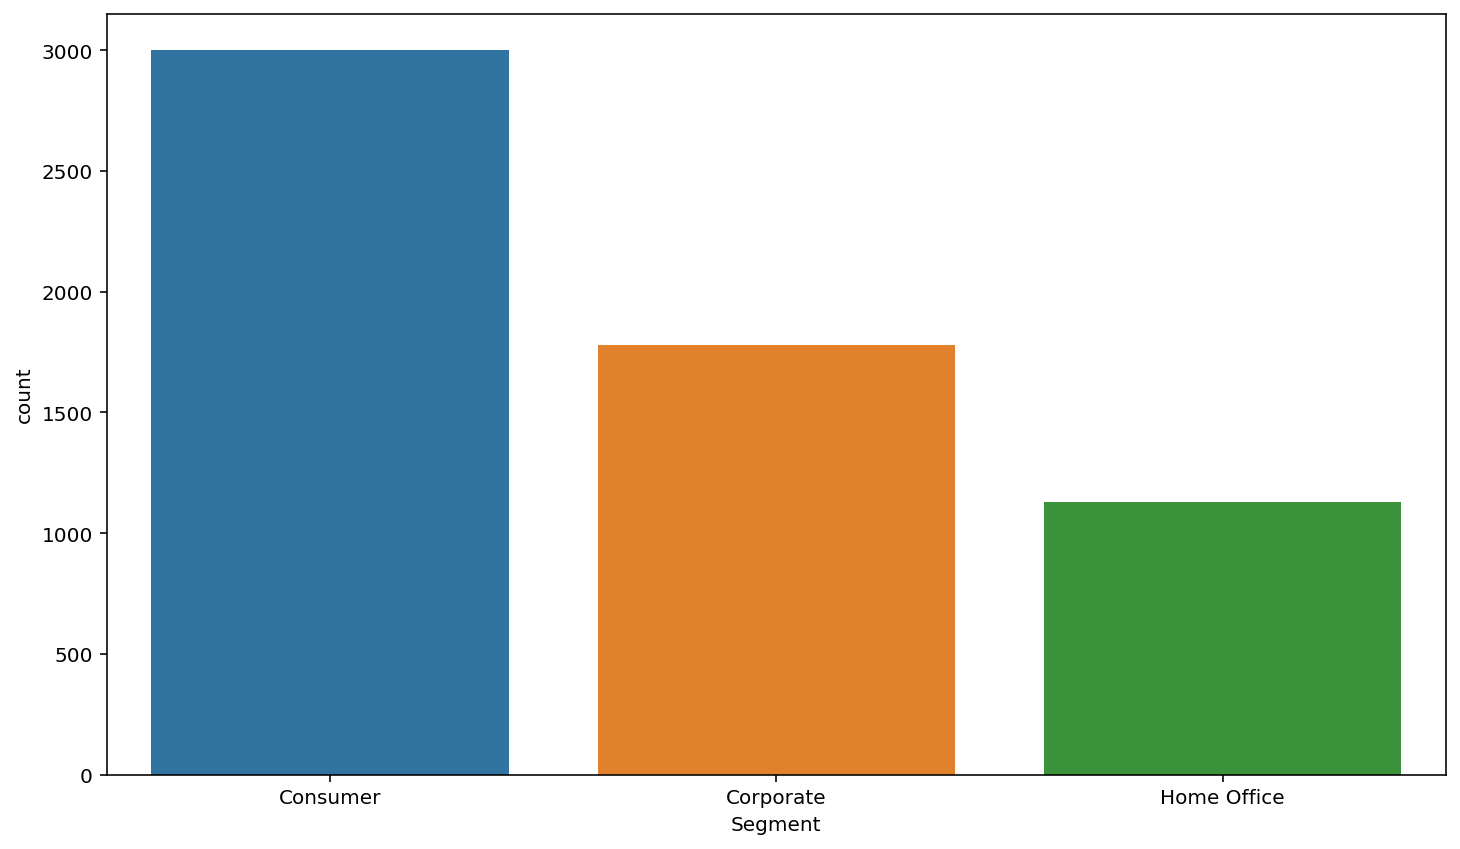

In [65]:
# Total number of transactions by customer segment
# The consumer segment has the highest number of transactions, followed by corporate and the home office having the least number of transactions.

# Countplot of Segment


sns.countplot(data=obs_df , x="Segment", hue="Segment")


<Axes: xlabel='Segment', ylabel='count'>

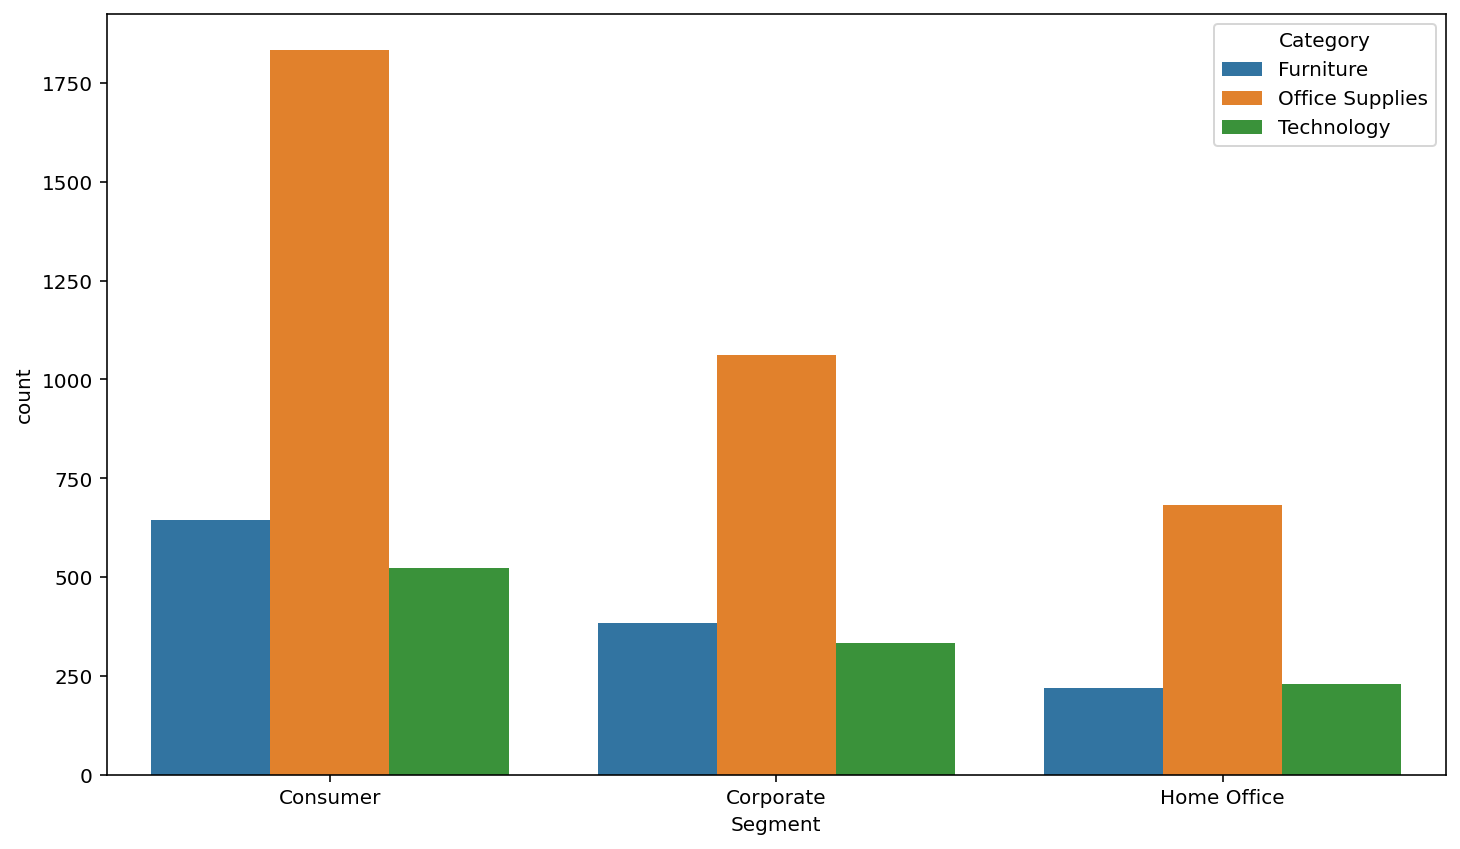

In [66]:
# Most shopped product Categories by segments
# The office supplies is the most shopped category across all consumer segments.Plot shows a regular pattern across all segments.

# Countplot of Segment with hue='Category'

sns.countplot(data=obs_df , x="Segment", hue="Category")

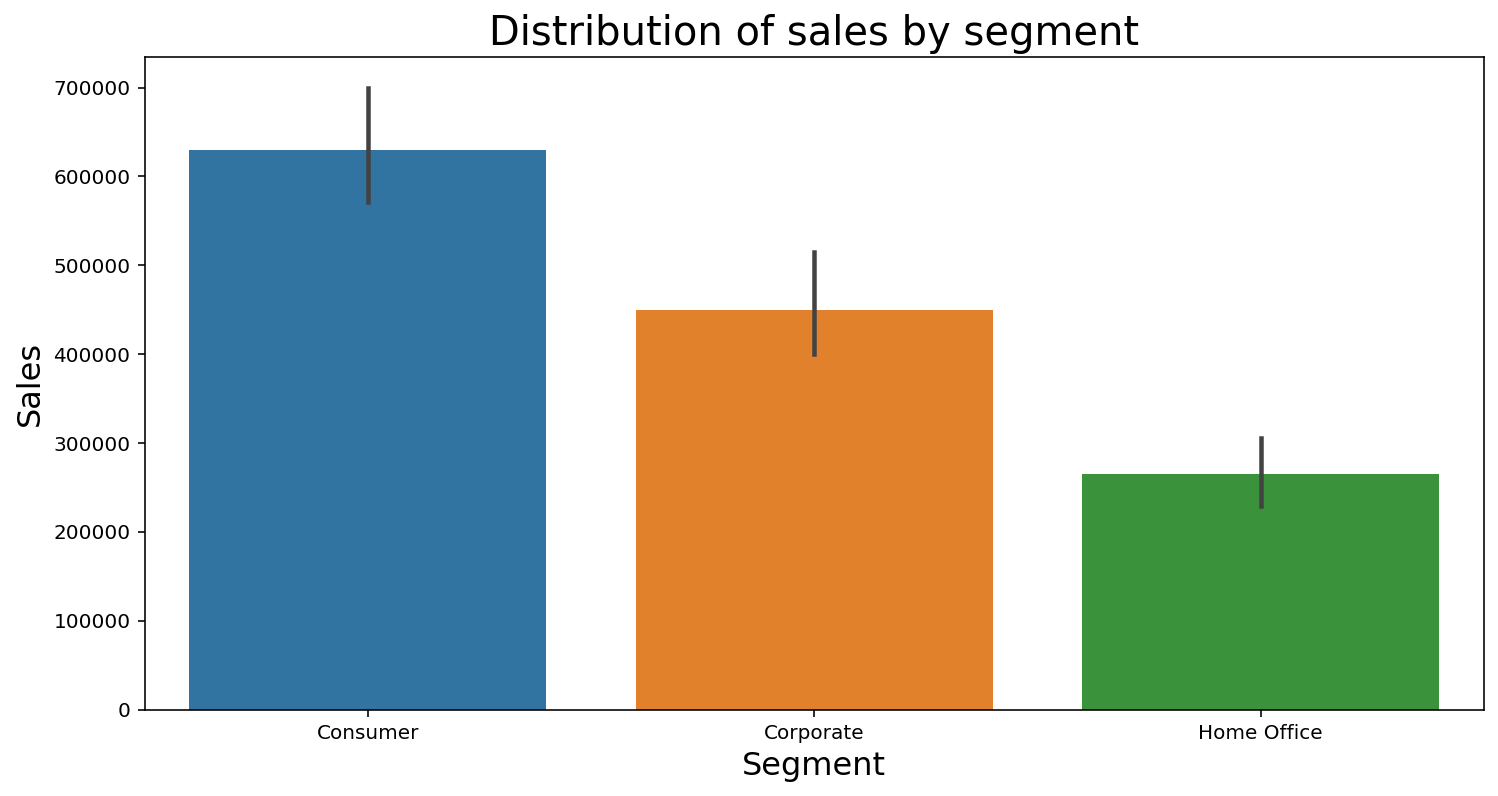

In [67]:
# Customer Segment with most total Sales
# Consumerhas the highest value of total sales at about $620,000 while home office has the least total sales at about $380,000. there's a marked deviation of individual sale from the total sale in the consumer category, however the home office category has a close deviation of individual sale from the total sale.

# Barplot of Sales vs. Segment

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Segment', y='Sales', estimator=np.sum, hue = "Segment")
ax.set_xlabel('Segment', fontsize=16)
ax.set_ylabel('Sales', fontsize=16)
ax.set_title( 'Distribution of sales by segment', fontsize=20)
plt.show()

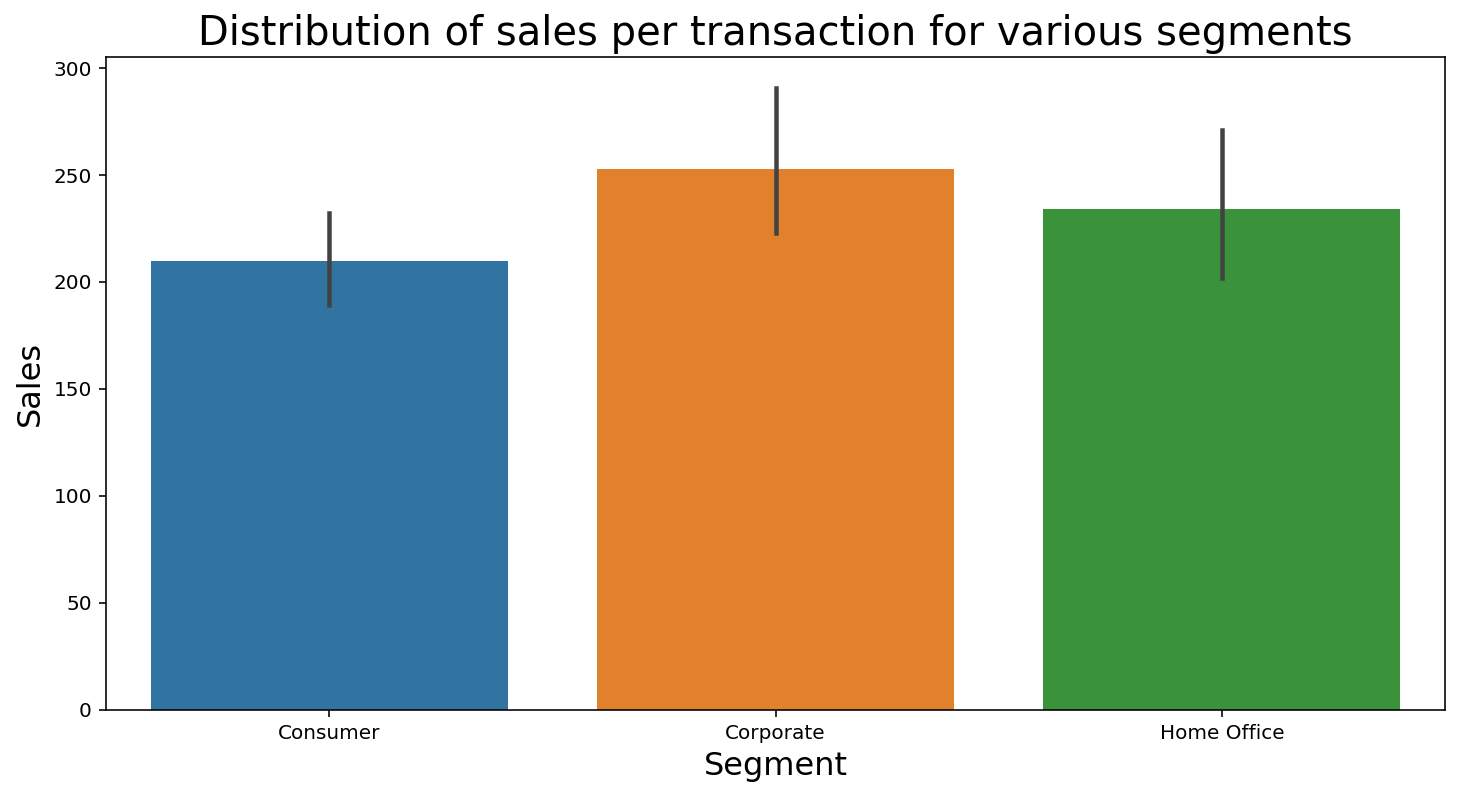

In [68]:
#Average Sales per Transaction across customer segments
#Corporate segment has the highetst value of sales per transaction

# Barplot of Sales vs. Segment with estimator=np.mean

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Segment', y='Sales', estimator=np.mean, hue = "Segment")
ax.set_xlabel('Segment', fontsize=16)
ax.set_ylabel('Sales', fontsize=16)
ax.set_title( 'Distribution of sales per transaction for various segments', fontsize=20)
plt.show()

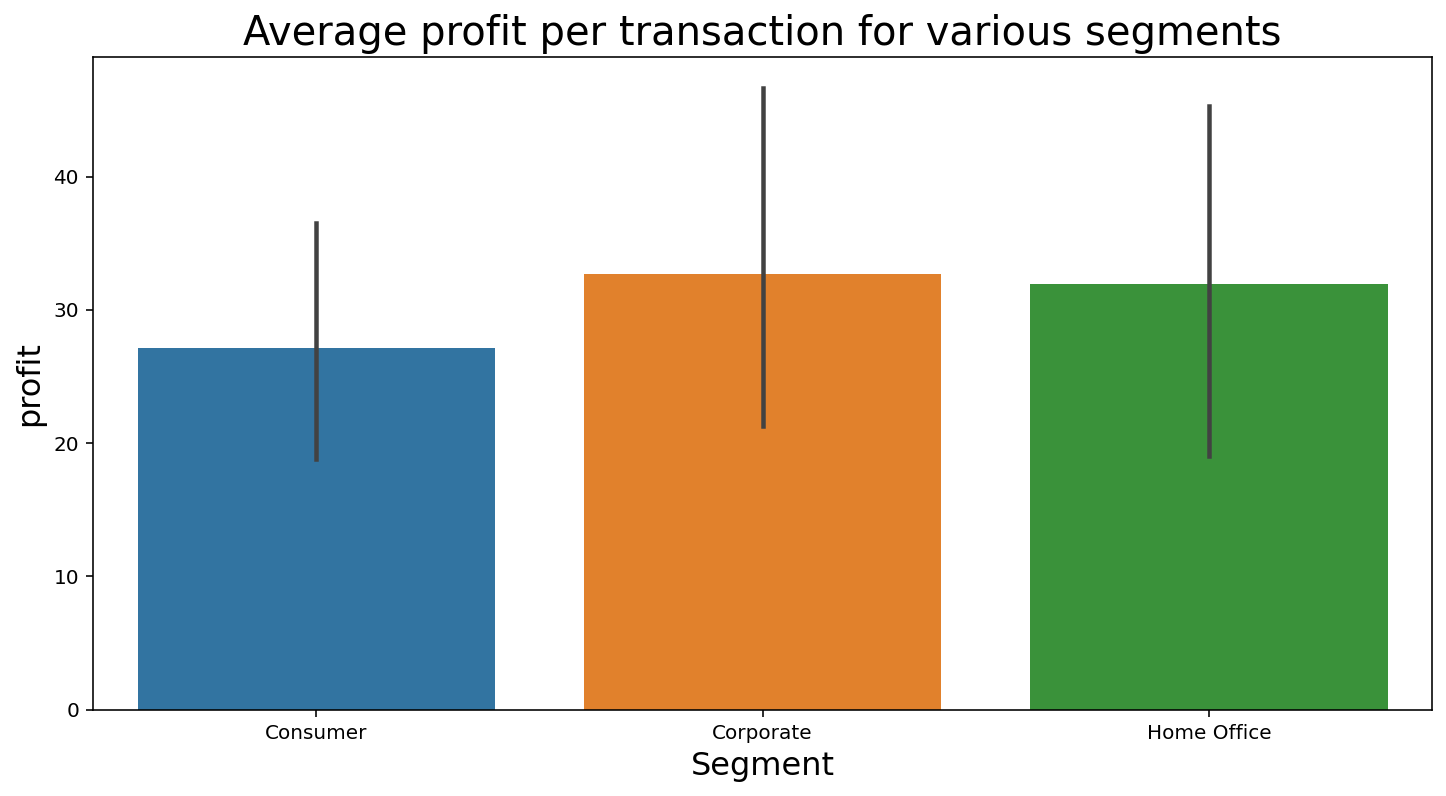

In [69]:
# Average profit per transaction by Customer Segment
# Corporate segment has the highest average profit per transaction, there's a marked deviation of the individual transactions from the mean as observed by the candle stick on the barplots.

# Barplot of Profit vs. Segment with estimator=np.mean

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Segment', y='Profit', estimator=np.mean, hue = "Segment")
ax.set_xlabel('Segment', fontsize=16)
ax.set_ylabel('profit', fontsize=16)
ax.set_title( 'Average profit per transaction for various segments', fontsize=20)
plt.show()

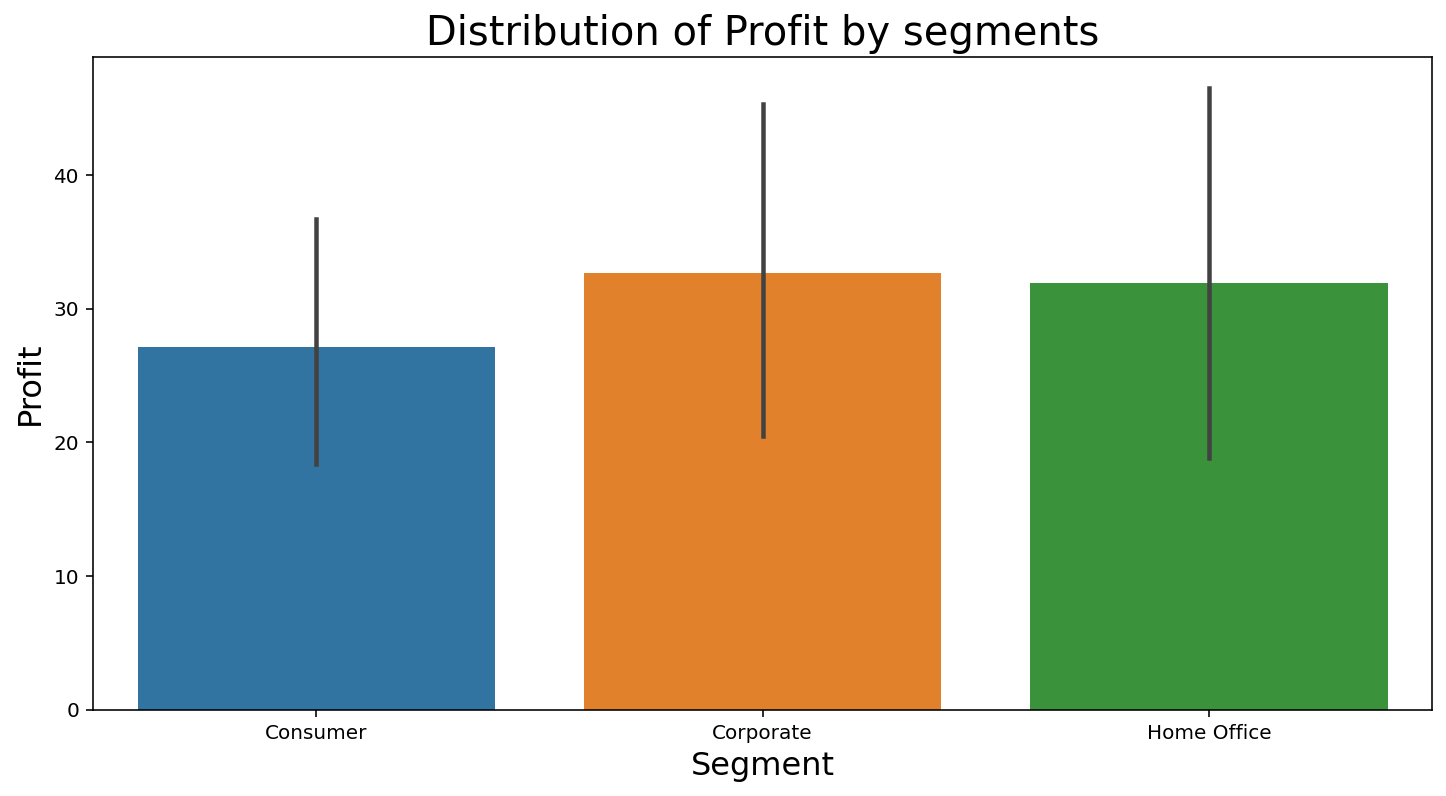

In [70]:
# Total profit by Customer Segment
# Corporate segment has the highest profit,followed by home office and the consumers having the least profit.

# Barplot of Profit vs. Segment

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Segment', y='Profit', hue = "Segment")
ax.set_xlabel('Segment', fontsize=16)
ax.set_ylabel('Profit', fontsize=16)
ax.set_title( 'Distribution of Profit by segments', fontsize=20)
plt.show()

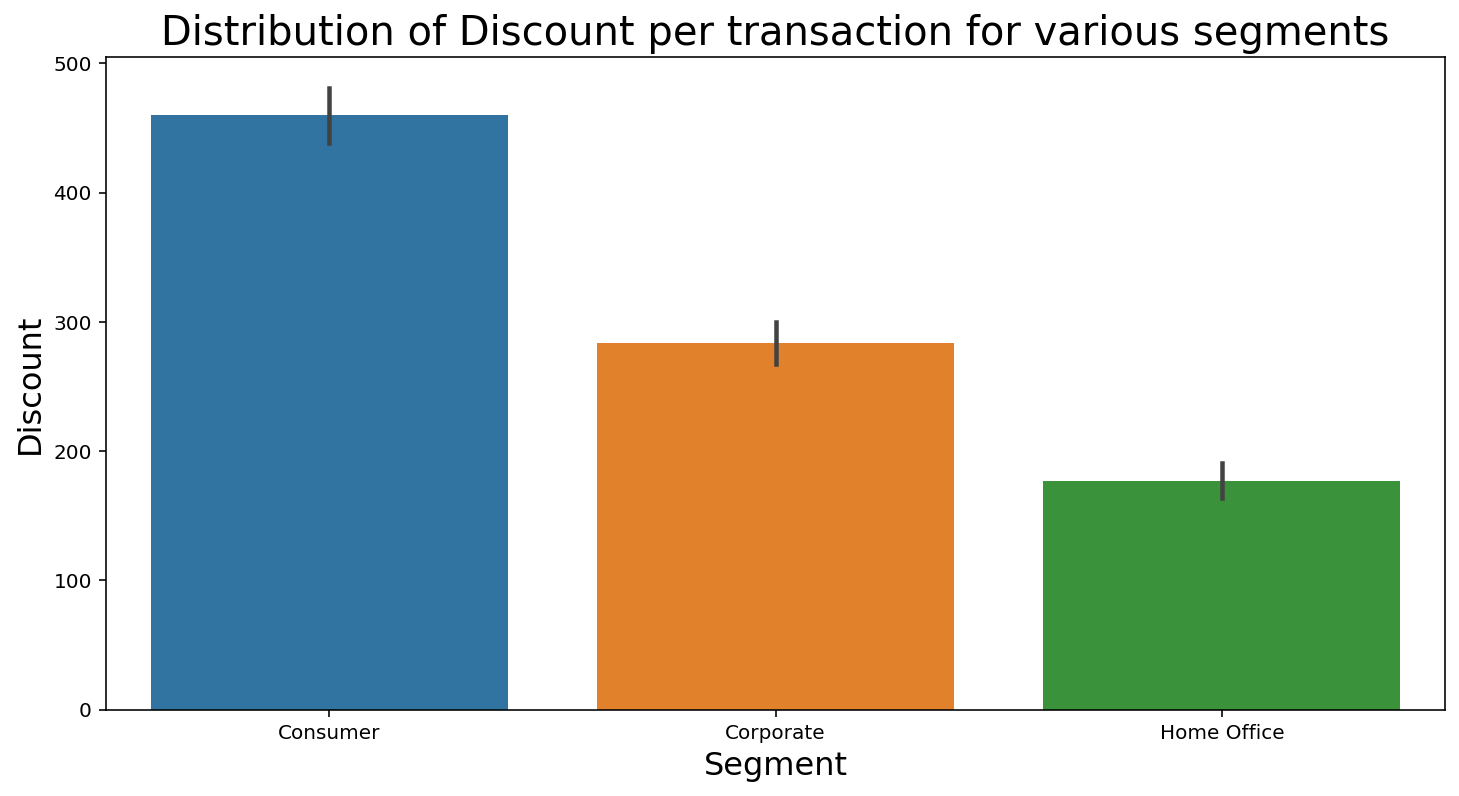

In [71]:
# Total amount of discount by customer Segment.
# Consumer is the category with the highest amount of discount per transaction while the home office has the least amount f discount per transaction.

# Barplot of Discount vs. Segment

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Segment', y='Discount',estimator=np.sum, hue = "Segment")
ax.set_xlabel('Segment', fontsize=16)
ax.set_ylabel('Discount', fontsize=16)
ax.set_title( 'Distribution of Discount per transaction for various segments', fontsize=20)
plt.show()

<Axes: xlabel='Segment', ylabel='count'>

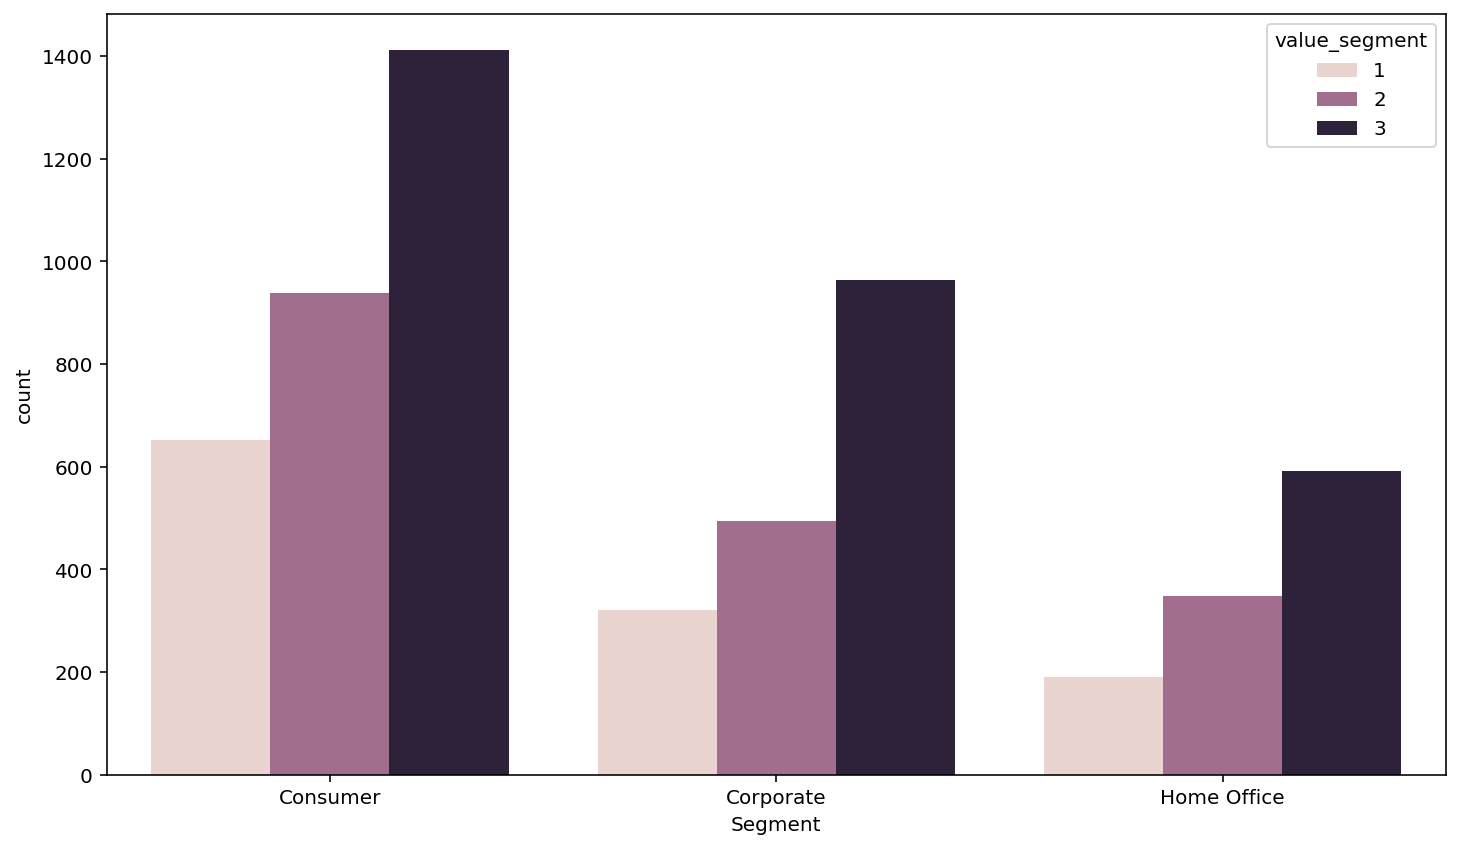

In [72]:
# Total number of transactions by Customer Segments by all rfm value_segments
# Plot shows the consumer has the highest number of transactions while the home office has least number of transactions.Across all customer segments, champions have the highest number of transactions.

# Countplot of Segment with hue='value_segment'

sns.countplot(data=obs_df , x="Segment", hue="value_segment")

<Axes: xlabel='Segment', ylabel='count'>

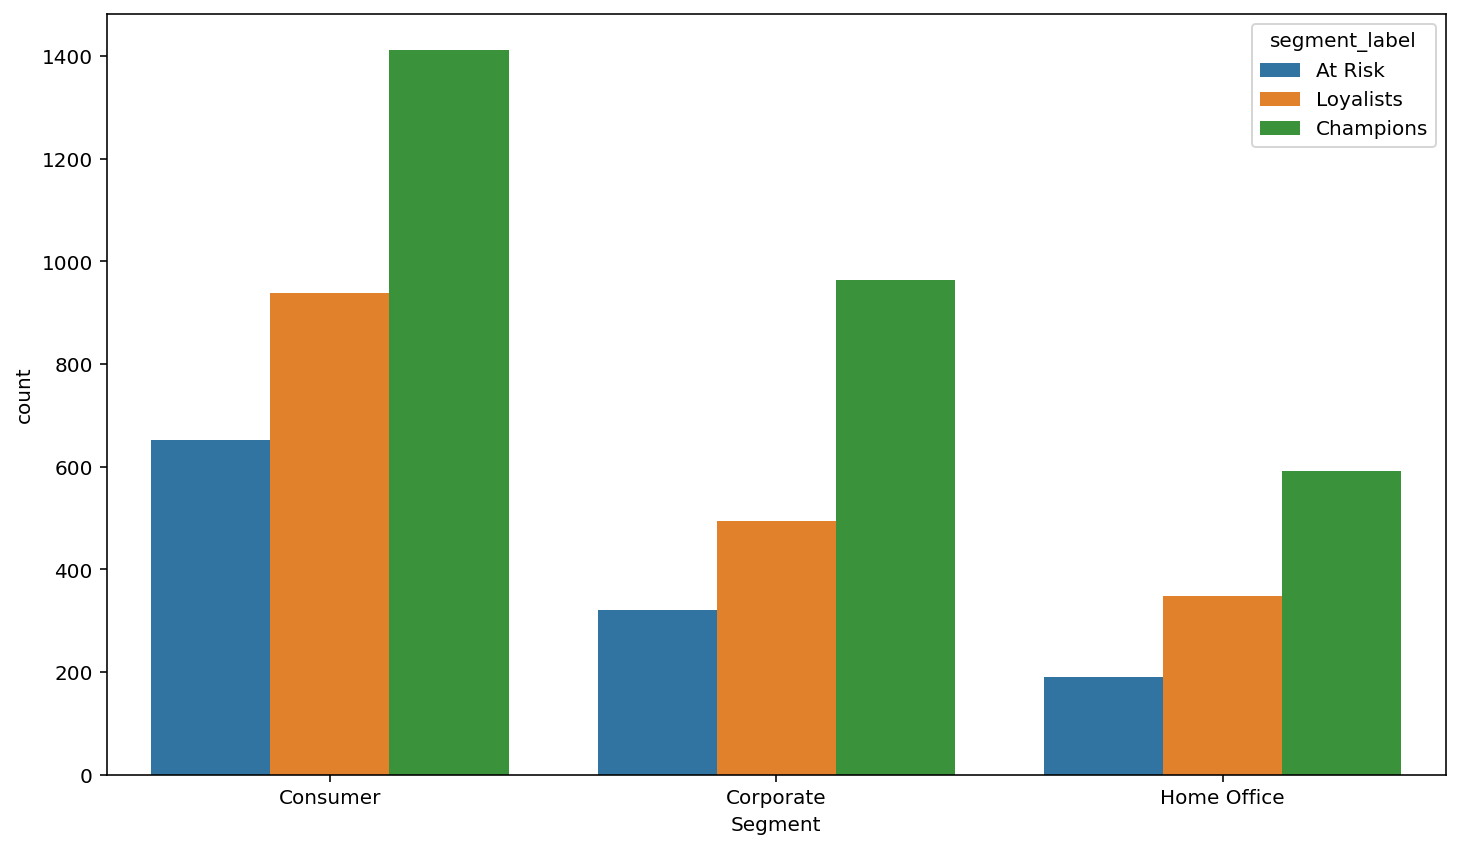

In [73]:
sns.countplot(data=obs_df , x="Segment", hue="segment_label")

### **Region Analysis**



<Axes: xlabel='Region', ylabel='count'>

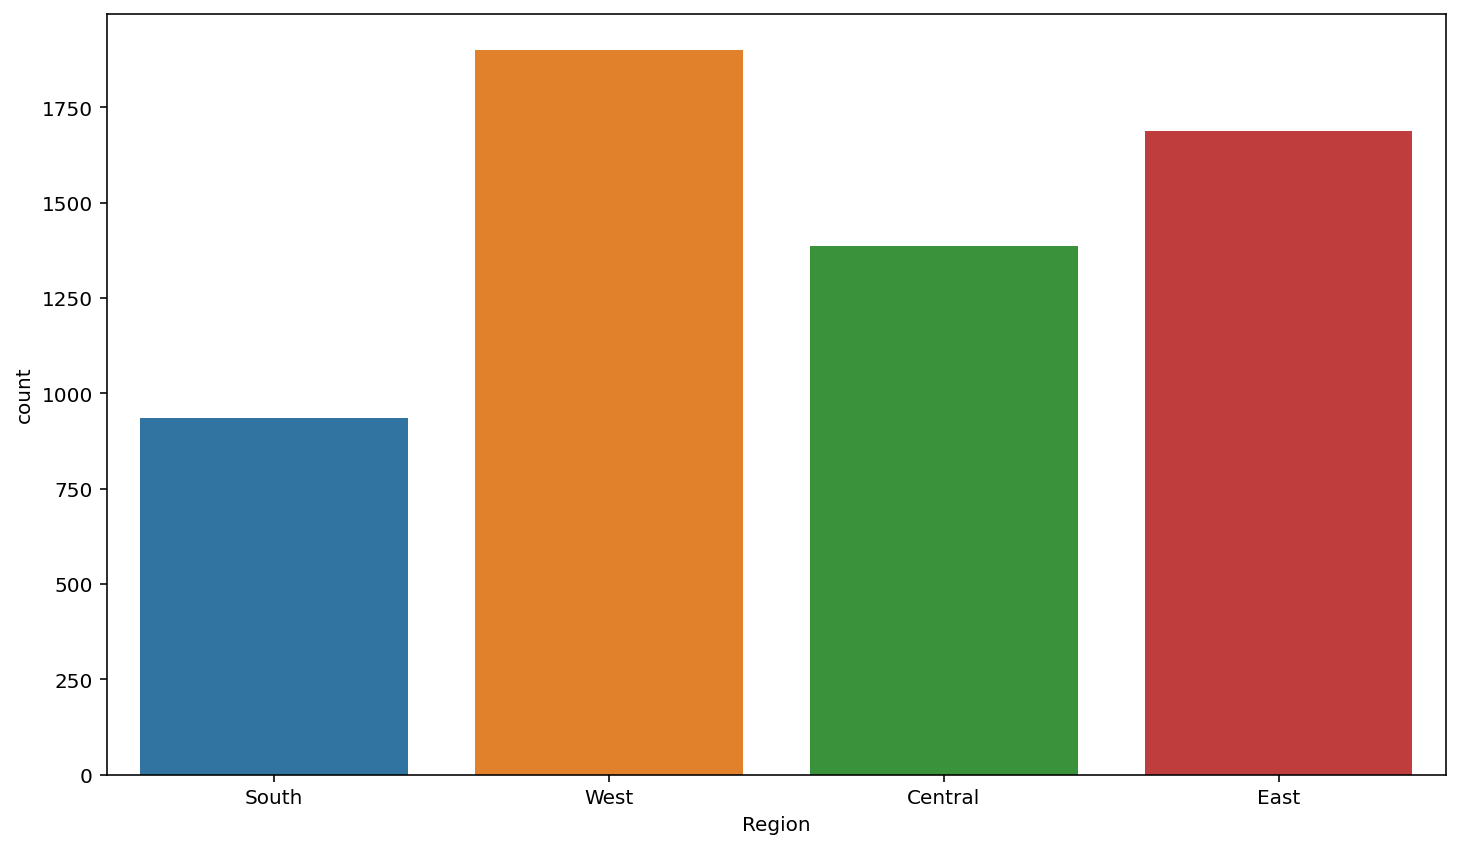

In [74]:
# Region with the highest number of transactions
# The west has the highest number of transactions while the south has the least number of transactions.

# Countplot of Region

sns.countplot(data=obs_df , x="Region", hue="Region")

<Axes: xlabel='Region', ylabel='count'>

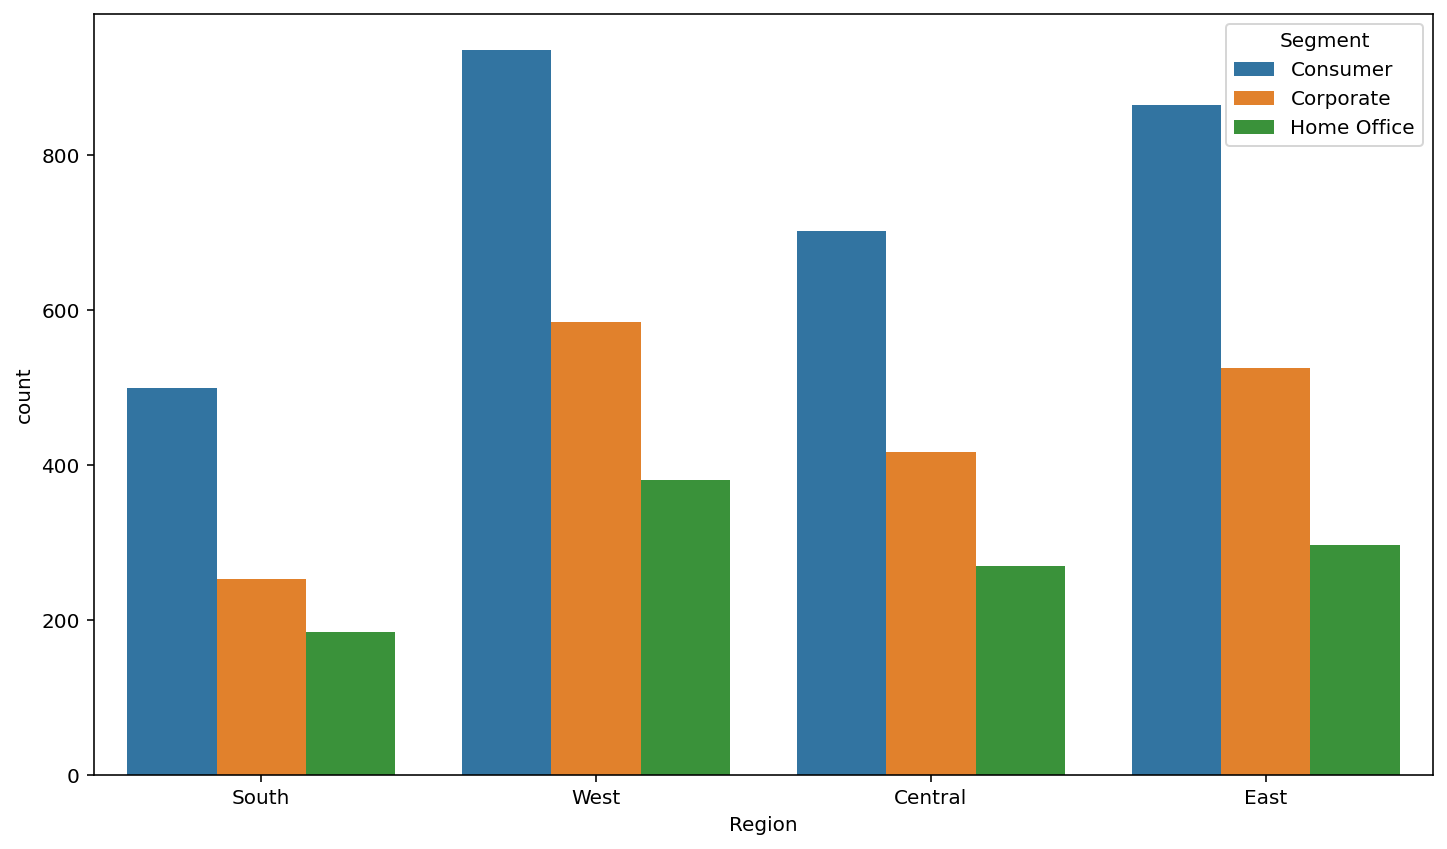

In [75]:
# Total number of transactions by Region across customer segments
# The consumer segment has the highest number of transactions across all region,followed by the corporate and the home office has thr least number of total tranasction across all regions.

# Countplot of region with hue='Segment'

sns.countplot(data=obs_df , x="Region", hue="Segment")

<Axes: xlabel='segment_label', ylabel='count'>

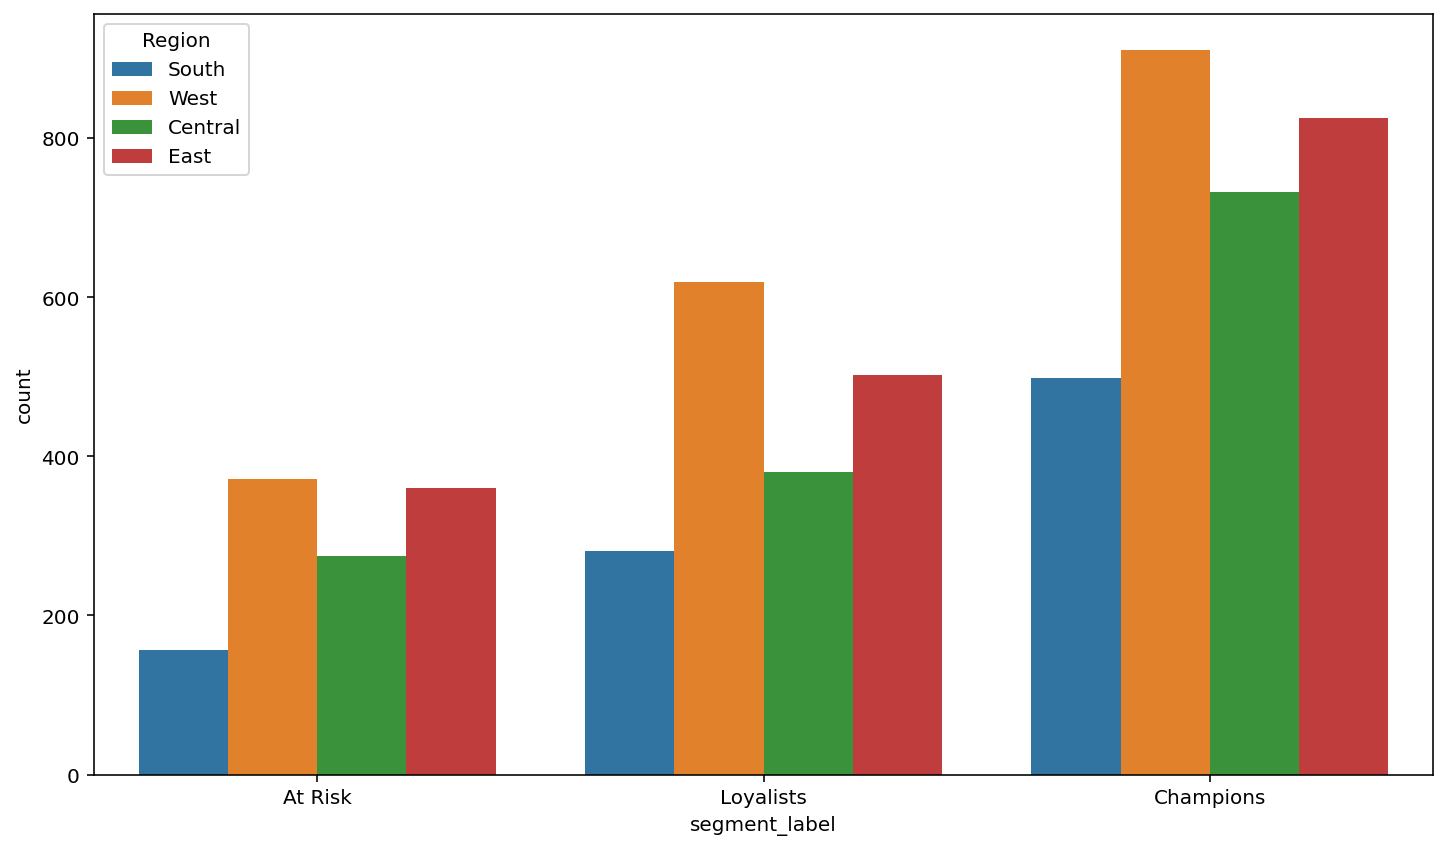

In [76]:
# Number of transactions by rfm value segment over all regions
# Champions have the higest number of transactions while the "at risk" group have the lowest number of transactions.The east

#countplot of rfm value_segment with hue='Region'

sns.countplot(data=obs_df , x="segment_label", hue="Region")

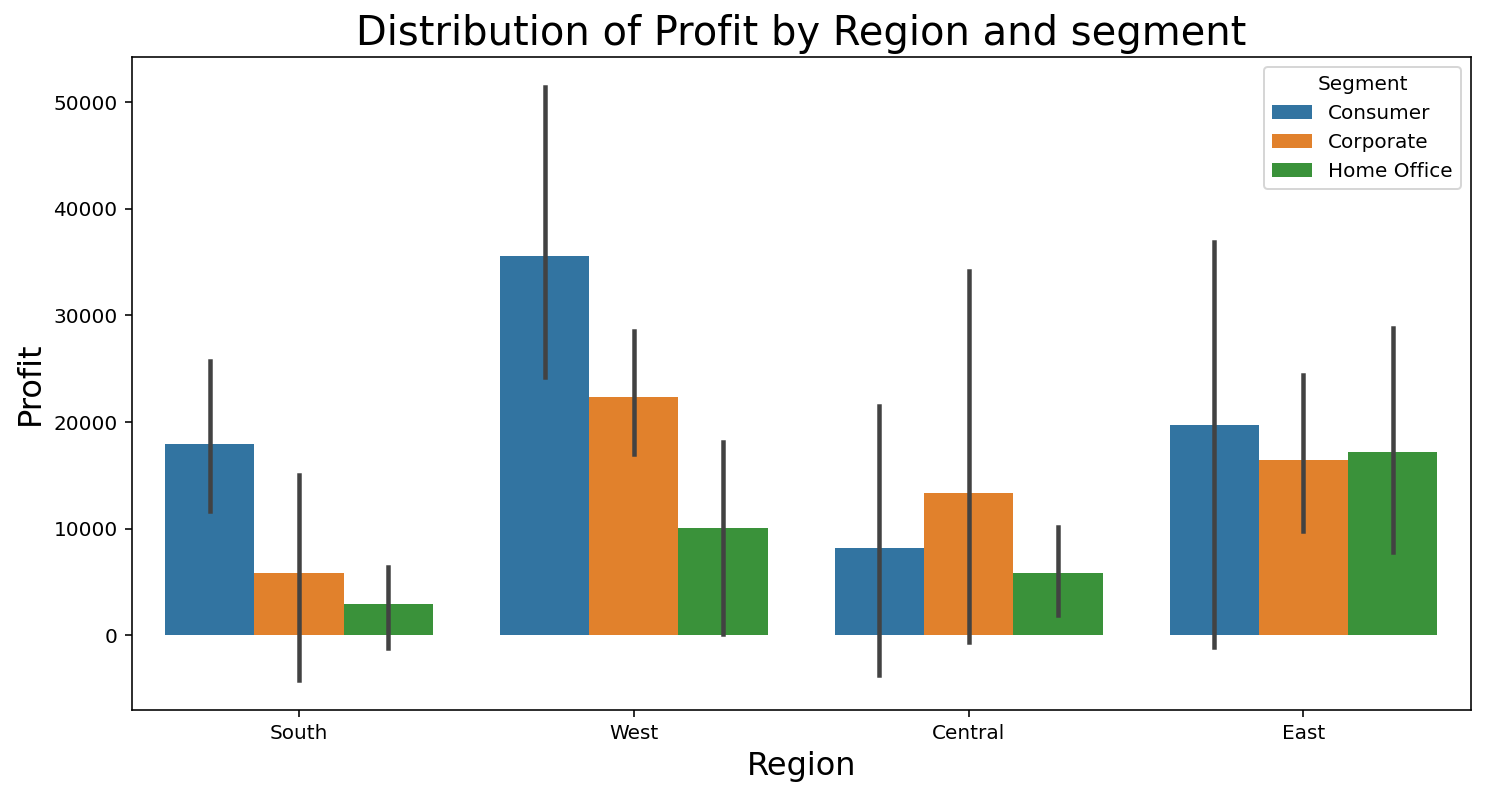

In [77]:
# Total profit by region across all customer segments
# In the south, west and eastern region, the consumer is the most profitable segment,however, the corporate segment is the most profitable in the central region.

# barplot of Profit vs. Region with hue='Segmnt'

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='Region', y='Profit',estimator=np.sum, hue = "Segment")
ax.set_xlabel('Region', fontsize=16)
ax.set_ylabel('Profit', fontsize=16)
ax.set_title( 'Distribution of Profit by Region and segment', fontsize=20)
plt.show()

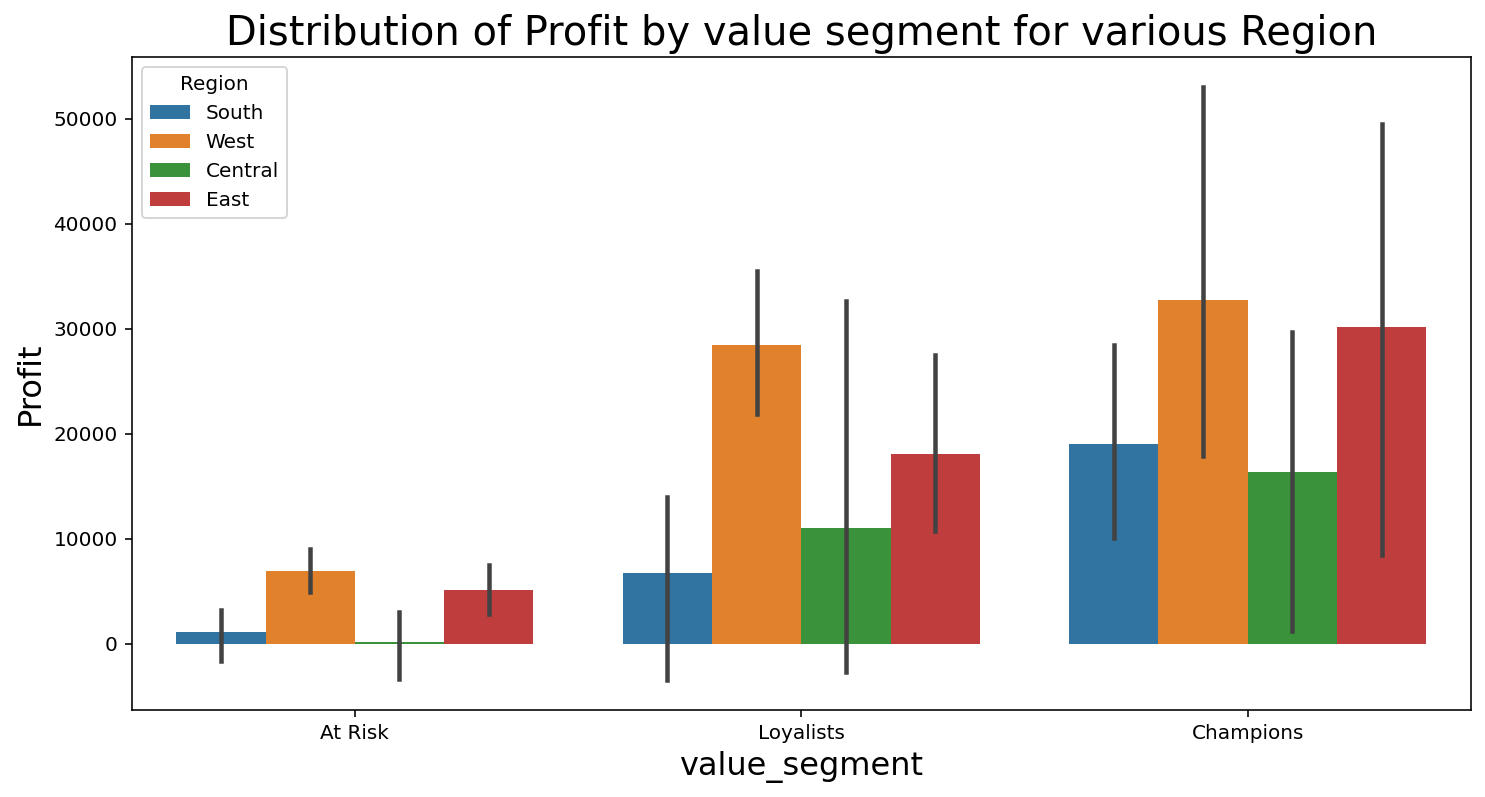

In [78]:
# Total profit by rfm value_segment across all regions
# The west has the highest total profit acros all value segments,followed by he east and then te central leaving the south as the region with the least total profit.

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=obs_df, x='segment_label', y='Profit',estimator=np.sum, hue = "Region")
ax.set_xlabel('value_segment', fontsize=16)
ax.set_ylabel('Profit', fontsize=16)
ax.set_title( 'Distribution of Profit by value segment for various Region', fontsize=20)
plt.show()

## Recommendations

Provide recommendations to Superstore based on findings from your analysis.



In [79]:
# Distribution of customers by value segment shows a close comparison between loyalists and champions.This indicates a high chance of having then upgraded to champions through the proposed loyalty program.

#Customer average spend per value segment shows a wide range comparison amongst the segments. Less emphasy should be placed on the customers in the segment 'At Risk'

#Although Technology product category gives the highest profit margin,the office supplies is the most bought category across all value segments. Promotion can be targetted at products in the Technology and office supplies categories to improve sales and profit. The furniture category is adviced to be exempted from the promotion or given lesser attenion compared to others. 

# The high performing staff are also adviced to be deployed to the technology and office suppies departments to drive more sales and profit in these categories.

#The regions that gave the highest volume of sales are West and East, there can be online targetted adverts that target other regions to improve patronage from residents in those regions.

# The proposed cash reward values to each customer segment as proposed by the manager is in order, but should be targetted at purchases only in the Office supplies and Technology categories.

# Looking at the customer segments, the corporate and home office are the most patronizing and profitble groups.More promotion strategies can be deployed to attract more sales in these groups. 